In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


import tensorflow as tf

### Historical_Wildfires.csv
For now, I will isolate the y_target, 'Estimated_fire_area' in order to see how many missing values we have on our dependant variable.

In [304]:
wildfires = pd.read_csv('Historical_wildfires.csv')
wildfires['Date'] = pd.to_datetime(wildfires['Date'])
# wildfires = pd.pivot(wildfires, index = 'Date', columns = 'Region', values = 'Estimated_fire_area')
wildfires

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,2005-01-04,8.680000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R
1,NSW,2005-01-05,16.611250,322.475000,62.362500,85.500000,8.088793,65.428571,8,R
2,NSW,2005-01-06,5.520000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R
3,NSW,2005-01-07,6.264000,313.870000,33.800000,92.200000,7.529940,56.700000,5,R
4,NSW,2005-01-08,5.400000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R
...,...,...,...,...,...,...,...,...,...,...
26401,WA,2020-10-27,32.970000,324.068182,103.318182,84.363636,5.277741,27.854545,11,N
26402,WA,2020-10-28,20.840625,314.425000,37.256250,88.312500,8.121730,65.962500,16,N
26403,WA,2020-10-29,136.083077,323.588461,294.102564,92.974359,8.282789,68.604588,39,N
26404,WA,2020-10-30,42.397895,324.205263,54.994737,89.631579,8.461107,71.590327,38,N


In [305]:
wildfires = pd.pivot(wildfires, index = 'Date', columns = 'Region', values = ['Estimated_fire_area', 'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power'])

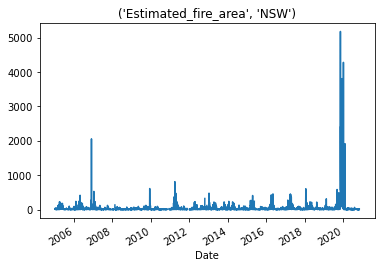

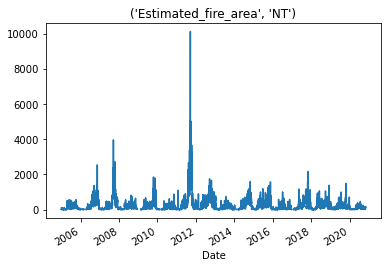

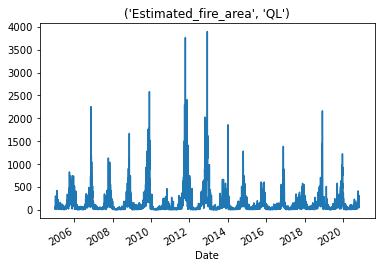

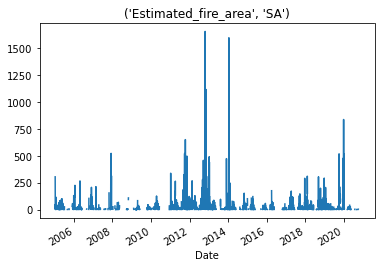

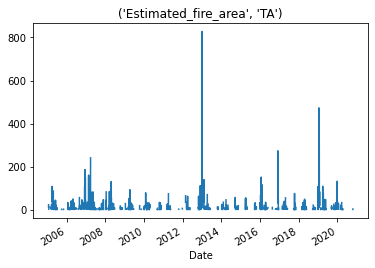

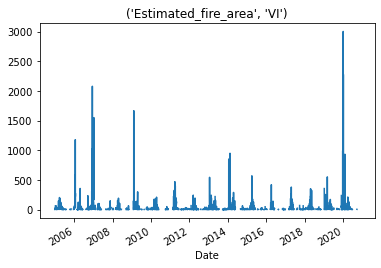

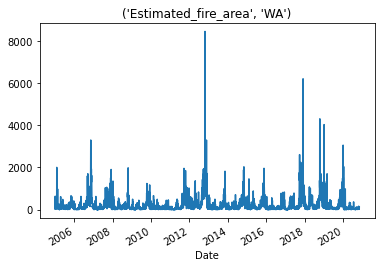

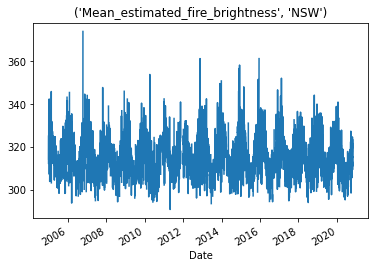

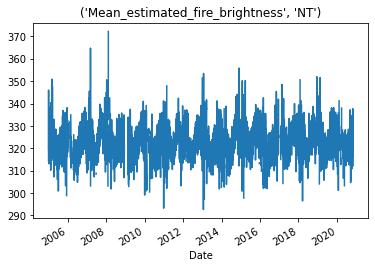

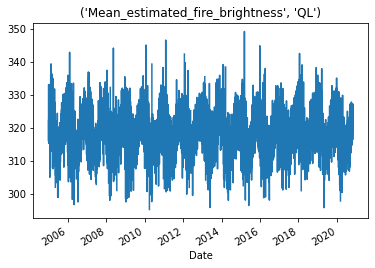

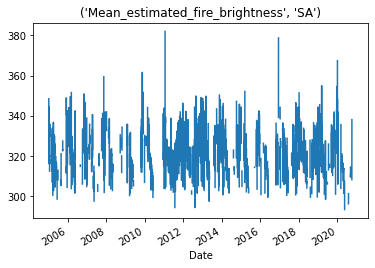

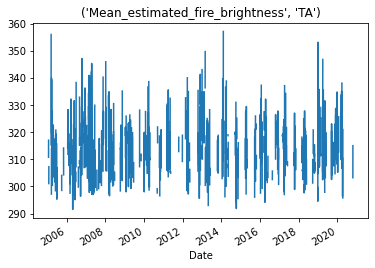

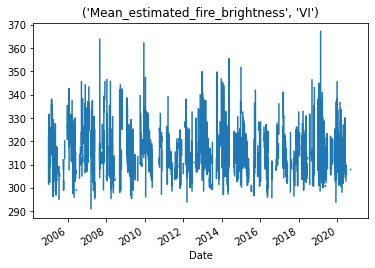

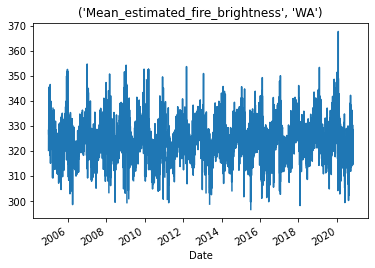

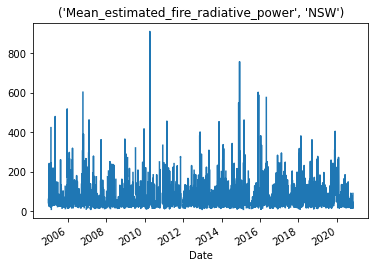

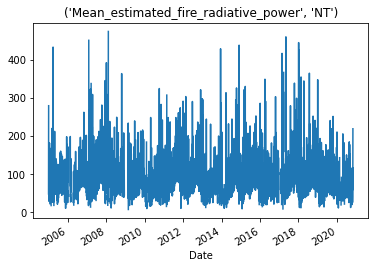

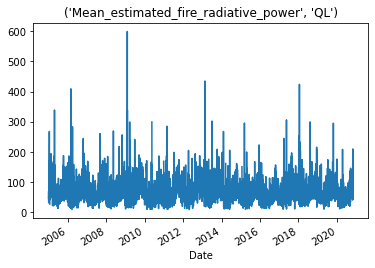

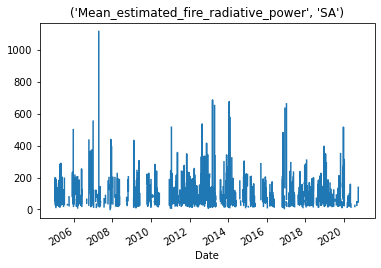

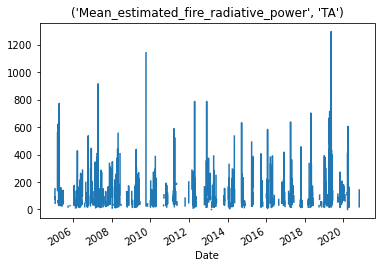

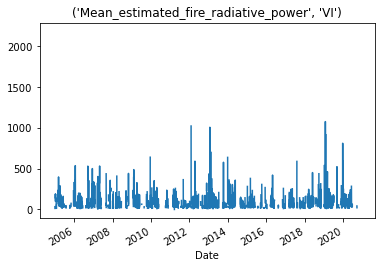

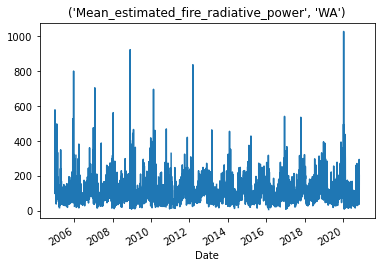

In [298]:
for i in wildfires.columns:
    wildfires[i].plot()
    plt.title('{}'.format(i))
    plt.show();

In [306]:
wildfires

Estimated_fire_area                                       \
Region                     NSW          NT          QL  SA  TA   VI   
Date                                                                  
2005-01-01                 NaN    4.945000   38.831579 NaN NaN  NaN   
2005-01-02                 NaN    1.320000   64.464286 NaN NaN  2.8   
2005-01-03                 NaN   88.740000   47.386585 NaN NaN  1.0   
2005-01-04             8.68000         NaN   30.100000 NaN NaN  NaN   
2005-01-05            16.61125         NaN    4.000000 NaN NaN  NaN   
...                        ...         ...         ...  ..  ..  ...   
2020-10-27             1.21000   12.750000   78.670769 NaN NaN  NaN   
2020-10-28             3.00000  144.990566  119.608649 NaN NaN  2.0   
2020-10-29                 NaN   53.462326  249.090625 NaN NaN  NaN   
2020-10-30             1.32000  171.325280  282.538983 NaN NaN  2.0   
2020-10-31            20.27600  115.588461  297.627826 NaN NaN  NaN   

                       Mean_estimated_fire_brightness                          \
Region              WA                            NSW          NT          QL   
Date                                                                            
2005-01-01   36.382500                            NaN  314.425000  322.197368   
2005-01-02  148.106471                            NaN  346.000000  315.991071   
2005-01-03   60.632258                            NaN  319.446429  333.092683   
2005-01-04   86.374167                     312.266667         NaN  315.216667   
2005-01-05   31.378947                     322.475000         NaN  326.412500   
...                ...                            ...         ...         ...   
2020-10-27   32.970000                     311.100000  312.008333  322.305385   
2020-10-28   20.840625                     323.166667  337.718396  320.891892   
2020-10-29  136.083077                            NaN  332.346512  327.207552   
2020-10-30   42.397895                     315.100000  336.928000  324.786017   
2020-10-31  107.370851                     315.040000  327.117308  321.767150   

            ...                          Mean_estimated_fire_radiative_power  \
Region      ...  TA       VI          WA                                 NSW   
Date        ...                                                                
2005-01-01  ... NaN      NaN  320.146875                                 NaN   
2005-01-02  ... NaN  321.700  328.423529                                 NaN   
2005-01-03  ... NaN  301.550  328.088710                                 NaN   
2005-01-04  ... NaN      NaN  326.426389                           42.400000   
2005-01-05  ... NaN      NaN  339.939474                           62.362500   
...         ...  ..      ...         ...                                 ...   
2020-10-27  ... NaN      NaN  324.068182                           16.800000   
2020-10-28  ... NaN  312.025  314.425000                           20.566667   
2020-10-29  ... NaN      NaN  323.588461                                 NaN   
2020-10-30  ... NaN  317.600  324.205263                           13.700000   
2020-10-31  ... NaN      NaN  330.057447                           88.460000   

                                                              
Region              NT          QL  SA  TA    VI          WA  
Date                                                          
2005-01-01   47.500000   45.757895 NaN NaN   NaN  100.750000  
2005-01-02  109.400000   58.492857 NaN NaN  34.1  578.464706  
2005-01-03  278.914286   69.860976 NaN NaN  13.4  126.077419  
2005-01-04         NaN   31.395833 NaN NaN   NaN  108.791667  
2005-01-05         NaN   58.150000 NaN NaN   NaN  157.247368  
...                ...         ...  ..  ..   ...         ...  
2020-10-27   40.133333   41.896923 NaN NaN   NaN  103.318182  
2020-10-28  116.102830  209.929730 NaN NaN  20.0   37.256250  
2020-10-29   60.288372   56.365104 NaN NaN   NaN  294.102564  
2020

In [300]:
# wildfires.reset_index(inplace=True)
# print('# of rows must equal :', len(pd.date_range(start = '2005-01-01', end = '2020-10-31')))
# wildfires

# of rows must equal : 5783


Date Estimated_fire_area                                       \
Region                            NSW          NT          QL  SA  TA   VI   
0      2005-01-01                 NaN    4.945000   38.831579 NaN NaN  NaN   
1      2005-01-02                 NaN    1.320000   64.464286 NaN NaN  2.8   
2      2005-01-03                 NaN   88.740000   47.386585 NaN NaN  1.0   
3      2005-01-04             8.68000         NaN   30.100000 NaN NaN  NaN   
4      2005-01-05            16.61125         NaN    4.000000 NaN NaN  NaN   
...           ...                 ...         ...         ...  ..  ..  ...   
5777   2020-10-27             1.21000   12.750000   78.670769 NaN NaN  NaN   
5778   2020-10-28             3.00000  144.990566  119.608649 NaN NaN  2.0   
5779   2020-10-29                 NaN   53.462326  249.090625 NaN NaN  NaN   
5780   2020-10-30             1.32000  171.325280  282.538983 NaN NaN  2.0   
5781   2020-10-31            20.27600  115.588461  297.627826 NaN NaN  NaN   

                   Mean_estimated_fire_brightness              ...      \
Region          WA                            NSW          NT  ...  TA   
0        36.382500                            NaN  314.425000  ... NaN   
1       148.106471                            NaN  346.000000  ... NaN   
2        60.632258                            NaN  319.446429  ... NaN   
3        86.374167                     312.266667         NaN  ... NaN   
4        31.378947                     322.475000         NaN  ... NaN   
...            ...                            ...         ...  ...  ..   
5777     32.970000                     311.100000  312.008333  ... NaN   
5778     20.840625                     323.166667  337.718396  ... NaN   
5779    136.083077                            NaN  332.346512  ... NaN   
5780     42.397895                     315.100000  336.928000  ... NaN   
5781    107.370851                     315.040000  327.117308  ... NaN   

                            Mean_estimated_fire_radiative_power              \
Region       VI          WA                                 NSW          NT   
0           NaN  320.146875                                 NaN   47.500000   
1       321.700  328.423529                                 NaN  109.400000   
2       301.550  328.088710                                 NaN  278.914286   
3           NaN  326.426389                           42.400000         NaN   
4           NaN  339.939474                           62.362500         NaN   
...         ...         ...                                 ...         ...   
5777        NaN  324.068182                           16.800000   40.133333   
5778    312.025  314.425000                           20.566667  116.102830   
5779        NaN  323.588461                                 NaN   60.288372   
5780    317.600  324.205263                           13.700000  101.471200   
5781        NaN  330.057447                           88.460000  218.473077   

                                              
Region          QL  SA  TA    VI          WA  
0        45.757895 NaN NaN   NaN  100.750000  
1        58.492857 NaN NaN  34.1  578.464706  
2        69.860976 NaN NaN  13.4  126.077419  
3        31.395833 NaN NaN   NaN  108.791667  
4        58.150000 NaN NaN   NaN  157.247368  
...            ...  ..  ..   ...         ...  
5777     41.896923 NaN NaN   NaN  103.318182  
5778    209.929730 NaN NaN  20.0   37.256250  
5779     56.365104 NaN NaN   NaN  294.102564  
5780     95.176271 NaN NaN  46.7   54.994737  
5781     61.613043 NaN NaN   NaN  201.625532  

[5782 rows x 22 columns]

In [308]:
wildfires

Estimated_fire_area                                       \
Region                     NSW          NT          QL  SA  TA   VI   
Date                                                                  
2005-01-01                 NaN    4.945000   38.831579 NaN NaN  NaN   
2005-01-02                 NaN    1.320000   64.464286 NaN NaN  2.8   
2005-01-03                 NaN   88.740000   47.386585 NaN NaN  1.0   
2005-01-04             8.68000         NaN   30.100000 NaN NaN  NaN   
2005-01-05            16.61125         NaN    4.000000 NaN NaN  NaN   
...                        ...         ...         ...  ..  ..  ...   
2020-10-27             1.21000   12.750000   78.670769 NaN NaN  NaN   
2020-10-28             3.00000  144.990566  119.608649 NaN NaN  2.0   
2020-10-29                 NaN   53.462326  249.090625 NaN NaN  NaN   
2020-10-30             1.32000  171.325280  282.538983 NaN NaN  2.0   
2020-10-31            20.27600  115.588461  297.627826 NaN NaN  NaN   

                       Mean_estimated_fire_brightness                          \
Region              WA                            NSW          NT          QL   
Date                                                                            
2005-01-01   36.382500                            NaN  314.425000  322.197368   
2005-01-02  148.106471                            NaN  346.000000  315.991071   
2005-01-03   60.632258                            NaN  319.446429  333.092683   
2005-01-04   86.374167                     312.266667         NaN  315.216667   
2005-01-05   31.378947                     322.475000         NaN  326.412500   
...                ...                            ...         ...         ...   
2020-10-27   32.970000                     311.100000  312.008333  322.305385   
2020-10-28   20.840625                     323.166667  337.718396  320.891892   
2020-10-29  136.083077                            NaN  332.346512  327.207552   
2020-10-30   42.397895                     315.100000  336.928000  324.786017   
2020-10-31  107.370851                     315.040000  327.117308  321.767150   

            ...                          Mean_estimated_fire_radiative_power  \
Region      ...  TA       VI          WA                                 NSW   
Date        ...                                                                
2005-01-01  ... NaN      NaN  320.146875                                 NaN   
2005-01-02  ... NaN  321.700  328.423529                                 NaN   
2005-01-03  ... NaN  301.550  328.088710                                 NaN   
2005-01-04  ... NaN      NaN  326.426389                           42.400000   
2005-01-05  ... NaN      NaN  339.939474                           62.362500   
...         ...  ..      ...         ...                                 ...   
2020-10-27  ... NaN      NaN  324.068182                           16.800000   
2020-10-28  ... NaN  312.025  314.425000                           20.566667   
2020-10-29  ... NaN      NaN  323.588461                                 NaN   
2020-10-30  ... NaN  317.600  324.205263                           13.700000   
2020-10-31  ... NaN      NaN  330.057447                           88.460000   

                                                              
Region              NT          QL  SA  TA    VI          WA  
Date                                                          
2005-01-01   47.500000   45.757895 NaN NaN   NaN  100.750000  
2005-01-02  109.400000   58.492857 NaN NaN  34.1  578.464706  
2005-01-03  278.914286   69.860976 NaN NaN  13.4  126.077419  
2005-01-04         NaN   31.395833 NaN NaN   NaN  108.791667  
2005-01-05         NaN   58.150000 NaN NaN   NaN  157.247368  
...                ...         ...  ..  ..   ...         ...  
2020-10-27   40.133333   41.896923 NaN NaN   NaN  103.318182  
2020-10-28  116.102830  209.929730 NaN NaN  20.0   37.256250  
2020-10-29   60.288372   56.365104 NaN NaN   NaN  294.102564  
2020

In [311]:
dummy

""
2005-01-01
2005-01-02
2005-01-03
2005-01-04
2005-01-05
...
2020-10-27
2020-10-28
2020-10-29
2020-10-30


In [315]:
# Instantiating another dataframe with a daterange and merge to find the missing date.
dummy = pd.DataFrame(index= pd.date_range(start = '2005-01-01', end = '2020-10-31'))
# dummy['Date'] = pd.date_range(start = '2005-01-01', end = '2020-10-31')

# 2020-03-06 have missing values for all 7 states.
wildfires = pd.merge(wildfires, dummy, how = 'outer', left_index=True, right_index=True)
# wildfires.set_index('Date', inplace=True)
wildfires.sort_index(inplace=True)
wildfires

Estimated_fire_area                                       \
Region                     NSW          NT          QL  SA  TA   VI   
2005-01-01                 NaN    4.945000   38.831579 NaN NaN  NaN   
2005-01-02                 NaN    1.320000   64.464286 NaN NaN  2.8   
2005-01-03                 NaN   88.740000   47.386585 NaN NaN  1.0   
2005-01-04             8.68000         NaN   30.100000 NaN NaN  NaN   
2005-01-05            16.61125         NaN    4.000000 NaN NaN  NaN   
...                        ...         ...         ...  ..  ..  ...   
2020-10-27             1.21000   12.750000   78.670769 NaN NaN  NaN   
2020-10-28             3.00000  144.990566  119.608649 NaN NaN  2.0   
2020-10-29                 NaN   53.462326  249.090625 NaN NaN  NaN   
2020-10-30             1.32000  171.325280  282.538983 NaN NaN  2.0   
2020-10-31            20.27600  115.588461  297.627826 NaN NaN  NaN   

                       Mean_estimated_fire_brightness                          \
Region              WA                            NSW          NT          QL   
2005-01-01   36.382500                            NaN  314.425000  322.197368   
2005-01-02  148.106471                            NaN  346.000000  315.991071   
2005-01-03   60.632258                            NaN  319.446429  333.092683   
2005-01-04   86.374167                     312.266667         NaN  315.216667   
2005-01-05   31.378947                     322.475000         NaN  326.412500   
...                ...                            ...         ...         ...   
2020-10-27   32.970000                     311.100000  312.008333  322.305385   
2020-10-28   20.840625                     323.166667  337.718396  320.891892   
2020-10-29  136.083077                            NaN  332.346512  327.207552   
2020-10-30   42.397895                     315.100000  336.928000  324.786017   
2020-10-31  107.370851                     315.040000  327.117308  321.767150   

            ...                          Mean_estimated_fire_radiative_power  \
Region      ...  TA       VI          WA                                 NSW   
2005-01-01  ... NaN      NaN  320.146875                                 NaN   
2005-01-02  ... NaN  321.700  328.423529                                 NaN   
2005-01-03  ... NaN  301.550  328.088710                                 NaN   
2005-01-04  ... NaN      NaN  326.426389                           42.400000   
2005-01-05  ... NaN      NaN  339.939474                           62.362500   
...         ...  ..      ...         ...                                 ...   
2020-10-27  ... NaN      NaN  324.068182                           16.800000   
2020-10-28  ... NaN  312.025  314.425000                           20.566667   
2020-10-29  ... NaN      NaN  323.588461                                 NaN   
2020-10-30  ... NaN  317.600  324.205263                           13.700000   
2020-10-31  ... NaN      NaN  330.057447                           88.460000   

                                                              
Region              NT          QL  SA  TA    VI          WA  
2005-01-01   47.500000   45.757895 NaN NaN   NaN  100.750000  
2005-01-02  109.400000   58.492857 NaN NaN  34.1  578.464706  
2005-01-03  278.914286   69.860976 NaN NaN  13.4  126.077419  
2005-01-04         NaN   31.395833 NaN NaN   NaN  108.791667  
2005-01-05         NaN   58.150000 NaN NaN   NaN  157.247368  
...                ...         ...  ..  ..   ...         ...  
2020-10-27   40.133333   41.896923 NaN NaN   NaN  103.318182  
2020-10-28  116.102830  209.929730 NaN NaN  20.0   37.256250  
2020-10-29   60.288372   56.365104 NaN NaN   NaN  294.102564  
2020-10-30  101.471200   95.176271 NaN NaN  46.7   54.994737  
2020-10-31  218.473077   61.613043 NaN NaN   NaN  201.625532  

[5783 rows x 21 columns]

In [317]:
wildfires.iloc[:, :7].fillna(1, inplace=True)
wildfires

C:\Users\albert\Anaconda3\lib\site-packages\pandas\core\frame.py:4320: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


Estimated_fire_area                                         \
Region                     NSW          NT          QL   SA   TA   VI   
2005-01-01             1.00000    4.945000   38.831579  1.0  1.0  1.0   
2005-01-02             1.00000    1.320000   64.464286  1.0  1.0  2.8   
2005-01-03             1.00000   88.740000   47.386585  1.0  1.0  1.0   
2005-01-04             8.68000    1.000000   30.100000  1.0  1.0  1.0   
2005-01-05            16.61125    1.000000    4.000000  1.0  1.0  1.0   
...                        ...         ...         ...  ...  ...  ...   
2020-10-27             1.21000   12.750000   78.670769  1.0  1.0  1.0   
2020-10-28             3.00000  144.990566  119.608649  1.0  1.0  2.0   
2020-10-29             1.00000   53.462326  249.090625  1.0  1.0  1.0   
2020-10-30             1.32000  171.325280  282.538983  1.0  1.0  2.0   
2020-10-31            20.27600  115.588461  297.627826  1.0  1.0  1.0   

                       Mean_estimated_fire_brightness                          \
Region              WA                            NSW          NT          QL   
2005-01-01   36.382500                            NaN  314.425000  322.197368   
2005-01-02  148.106471                            NaN  346.000000  315.991071   
2005-01-03   60.632258                            NaN  319.446429  333.092683   
2005-01-04   86.374167                     312.266667         NaN  315.216667   
2005-01-05   31.378947                     322.475000         NaN  326.412500   
...                ...                            ...         ...         ...   
2020-10-27   32.970000                     311.100000  312.008333  322.305385   
2020-10-28   20.840625                     323.166667  337.718396  320.891892   
2020-10-29  136.083077                            NaN  332.346512  327.207552   
2020-10-30   42.397895                     315.100000  336.928000  324.786017   
2020-10-31  107.370851                     315.040000  327.117308  321.767150   

            ...                          Mean_estimated_fire_radiative_power  \
Region      ...  TA       VI          WA                                 NSW   
2005-01-01  ... NaN      NaN  320.146875                                 NaN   
2005-01-02  ... NaN  321.700  328.423529                                 NaN   
2005-01-03  ... NaN  301.550  328.088710                                 NaN   
2005-01-04  ... NaN      NaN  326.426389                           42.400000   
2005-01-05  ... NaN      NaN  339.939474                           62.362500   
...         ...  ..      ...         ...                                 ...   
2020-10-27  ... NaN      NaN  324.068182                           16.800000   
2020-10-28  ... NaN  312.025  314.425000                           20.566667   
2020-10-29  ... NaN      NaN  323.588461                                 NaN   
2020-10-30  ... NaN  317.600  324.205263                           13.700000   
2020-10-31  ... NaN      NaN  330.057447                           88.460000   

                                                              
Region              NT          QL  SA  TA    VI          WA  
2005-01-01   47.500000   45.757895 NaN NaN   NaN  100.750000  
2005-01-02  109.400000   58.492857 NaN NaN  34.1  578.464706  
2005-01-03  278.914286   69.860976 NaN NaN  13.4  126.077419  
2005-01-04         NaN   31.395833 NaN NaN   NaN  108.791667  
2005-01-05         NaN   58.150000 NaN NaN   NaN  157.247368  
...                ...         ...  ..  ..   ...         ...  
2020-10-27   40.133333   41.896923 NaN NaN   NaN  103.318182  
2020-10-28  116.102830  209.929730 NaN NaN  20.0   37.256250  
2020-10-29   60.288372   56.365104 NaN NaN   NaN  294.102564  
2020-10-30  101.471200   95.176271 NaN NaN  46.7   54.994737  
2020-10-31  218.473077   61.613043 NaN NaN   NaN  201.625532  

[5783 rows x 21 columns]

In [319]:
wildfires = wildfires.interpolate()

In [320]:
wildfires.fillna(method='bfill', inplace=True)

In [169]:
wildfires.fillna(1, inplace = True)
# wildfires.reset_index(inplace=True)
# wildfires

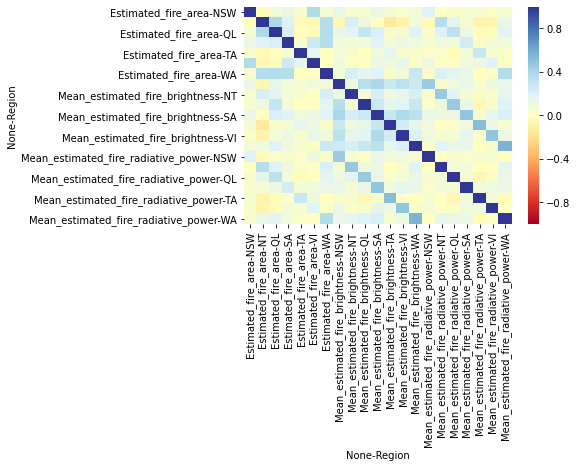

In [321]:
sns.heatmap(wildfires.corr(),vmin=-1, vmax=1, cmap = 'RdYlBu')

In [171]:
wildfires

,NSW,NT,QL,SA,TA,VI,WA
Date,,,,,,,
2005-01-01,1.00000,4.945000,38.831579,1.0,1.0,1.0,36.382500
2005-01-02,1.00000,1.320000,64.464286,1.0,1.0,2.8,148.106471
2005-01-03,1.00000,88.740000,47.386585,1.0,1.0,1.0,60.632258
2005-01-04,8.68000,1.000000,30.100000,1.0,1.0,1.0,86.374167
2005-01-05,16.61125,1.000000,4.000000,1.0,1.0,1.0,31.378947
...,...,...,...,...,...,...,...
2020-10-27,1.21000,12.750000,78.670769,1.0,1.0,1.0,32.970000
2020-10-28,3.00000,144.990566,119.608649,1.0,1.0,2.0,20.840625
2020-10-29,1.00000,53.462326,249.090625,1.0,1.0,1.0,136.083077


In [172]:
wildfires = np.log(wildfires)
wildfires['month'] = wildfires.index.month

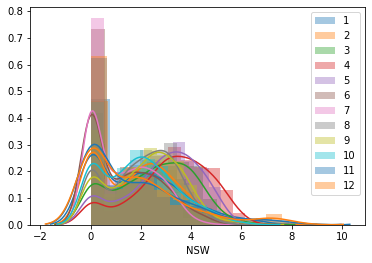

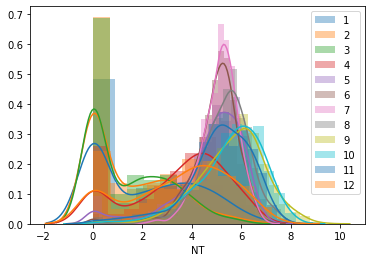

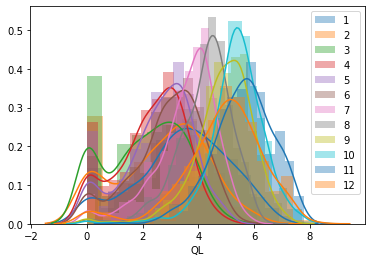

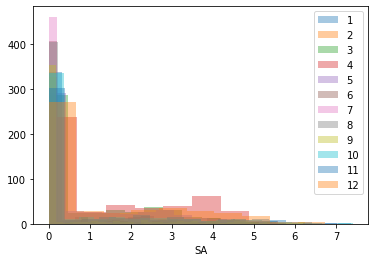

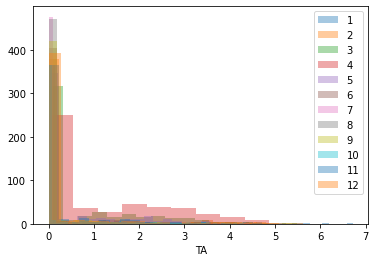

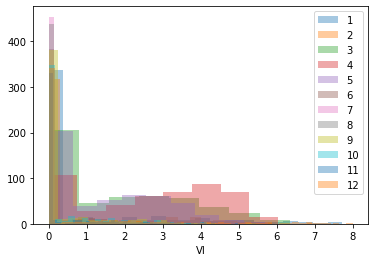

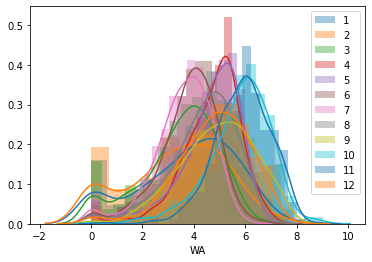

In [173]:
columns = ['NSW', 'NT', 'QL', 'SA', 'TA', 'VI', 'WA']
for x in columns:
    try:
        for i in range(1,13):
            sns.distplot(wildfires.loc[wildfires['month'].eq(i)][x], label = i)
        plt.legend()
    except:
        plt.clf()
        for i in range(1,13):
            sns.distplot(wildfires.loc[wildfires['month'].eq(i)][x], label = i, kde=False)
        plt.legend()
    plt.show();

In [174]:
import holidays
au_holidays = holidays.CountryHoliday('AU', years = list(range(2005,2021)))

In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

import datetime

In [176]:
_queensland = wildfires.copy(deep=True)
_queensland

,NSW,NT,QL,SA,TA,VI,WA,month
Date,,,,,,,,
2005-01-01,0.000000,1.598377,3.659234,0.0,0.0,0.000000,3.594088,1
2005-01-02,0.000000,0.277632,4.166111,0.0,0.0,1.029619,4.997931,1
2005-01-03,0.000000,4.485711,3.858339,0.0,0.0,0.000000,4.104827,1
2005-01-04,2.161022,0.000000,3.404525,0.0,0.0,0.000000,4.458689,1
2005-01-05,2.810080,0.000000,1.386294,0.0,0.0,0.000000,3.446137,1
...,...,...,...,...,...,...,...,...
2020-10-27,0.190620,2.545531,4.365272,0.0,0.0,0.000000,3.495598,10
2020-10-28,1.098612,4.976669,4.784225,0.0,0.0,0.693147,3.036904,10
2020-10-29,0.000000,3.978977,5.517817,0.0,0.0,0.000000,4.913266,10


In [177]:
_queens_log = _queensland.copy(deep=True)
# _queens_log['NT'] = np.log(_queens_log['NT'])

In [178]:
weather = pd.read_csv('HistoricalWeather.csv')
weather.columns = ['Date', 'Region', 'Parameter', 'count', 'min', 'max', 'mean', 'variance']
weather['Date'] = pd.to_datetime(weather['Date'])
weather

,Date,Region,Parameter,count,min,max,mean,variance
0,2005-01-01,NSW,Precipitation,8.002343e+05,0.000000,1.836935,0.044274,0.028362
1,2005-01-01,NSW,RelativeHumidity,8.002343e+05,13.877194,80.522964,36.355567,253.559937
2,2005-01-01,NSW,SoilWaterContent,8.002343e+05,0.002245,0.414305,0.170931,0.007758
3,2005-01-01,NSW,SolarRadiation,8.002343e+05,14.515009,32.169781,26.749389,6.078587
4,2005-01-01,NSW,Temperature,8.002343e+05,14.485785,35.878704,27.341182,18.562212
...,...,...,...,...,...,...,...,...
242776,2020-10-31,WA,RelativeHumidity,2.528546e+06,9.272744,82.022224,34.193973,309.018764
242777,2020-10-31,WA,SoilWaterContent,2.528546e+06,0.000000,0.285399,0.050737,0.001419
242778,2020-10-31,WA,SolarRadiation,2.528546e+06,17.072290,29.743744,26.746413,5.986063
242779,2020-10-31,WA,Temperature,2.528546e+06,16.238239,34.669132,28.090392,15.293953


In [179]:
# weather = weather.loc[weather['Region'].eq('QL')]
weather

,Date,Region,Parameter,count,min,max,mean,variance
0,2005-01-01,NSW,Precipitation,8.002343e+05,0.000000,1.836935,0.044274,0.028362
1,2005-01-01,NSW,RelativeHumidity,8.002343e+05,13.877194,80.522964,36.355567,253.559937
2,2005-01-01,NSW,SoilWaterContent,8.002343e+05,0.002245,0.414305,0.170931,0.007758
3,2005-01-01,NSW,SolarRadiation,8.002343e+05,14.515009,32.169781,26.749389,6.078587
4,2005-01-01,NSW,Temperature,8.002343e+05,14.485785,35.878704,27.341182,18.562212
...,...,...,...,...,...,...,...,...
242776,2020-10-31,WA,RelativeHumidity,2.528546e+06,9.272744,82.022224,34.193973,309.018764
242777,2020-10-31,WA,SoilWaterContent,2.528546e+06,0.000000,0.285399,0.050737,0.001419
242778,2020-10-31,WA,SolarRadiation,2.528546e+06,17.072290,29.743744,26.746413,5.986063
242779,2020-10-31,WA,Temperature,2.528546e+06,16.238239,34.669132,28.090392,15.293953


In [180]:
weather_pivot = pd.pivot(weather, index=['Date'], columns = ['Region','Parameter'], values = ['min', 'max','mean', 'variance'])
weather_pivot

min                                                   \
Region               NSW                                                    
Parameter  Precipitation RelativeHumidity SoilWaterContent SolarRadiation   
Date                                                                        
2005-01-01           0.0        13.877194         0.002245      14.515009   
2005-01-02           0.0        20.738882         0.001210      15.775055   
2005-01-03           0.0        26.145630         0.010889      15.362626   
2005-01-04           0.0        31.279930         0.022578       7.576938   
2005-01-05           0.0        24.466665         0.019950      14.087289   
...                  ...              ...              ...            ...   
2020-10-27           0.0        17.911118         0.007598       8.514027   
2020-10-28           0.0        20.347416         0.000000       9.952868   
2020-10-29           0.0        21.098156         0.004790      15.170402   
2020-10-30           0.0        23.371044         0.008776       8.277431   
2020-10-31           0.0        39.851624         0.012940       5.178627   

                                                                 \
Region                                      NT                    
Parameter  Temperature WindSpeed Precipitation RelativeHumidity   
Date                                                              
2005-01-01   14.485785  1.354448           0.0        14.558820   
2005-01-02   12.067627  0.864556           0.0        24.545588   
2005-01-03   16.858456  1.435490           0.0        26.324978   
2005-01-04   12.495799  1.401951           0.0        17.972591   
2005-01-05    9.611800  1.011328           0.0        12.375551   
...                ...       ...           ...              ...   
2020-10-27    7.288919  1.036175           0.0        14.552748   
2020-10-28    8.654533  0.790777           0.0         9.955595   
2020-10-29    9.860389  0.663298           0.0         9.798850   
2020-10-30   10.133630  1.465277           0.0        10.158679   
2020-10-31    8.298871  1.327121           0.0        10.292431   

                                            ...         variance  \
Region                                      ...               VI   
Parameter  SoilWaterContent SolarRadiation  ... SoilWaterContent   
Date                                        ...                    
2005-01-01     0.000000e+00       2.518120  ...         0.005088   
2005-01-02     5.487818e-07       3.624103  ...         0.004750   
2005-01-03     0.000000e+00       2.609383  ...         0.003815   
2005-01-04     4.041164e-07       5.795825  ...         0.004992   
2005-01-05     8.472707e-07       5.025146  ...         0.004828   
...                     ...            ...  ...              ...   
2020-10-27     2.327530e-07      17.342916  ...         0.005377   
2020-10-28     0.000000e+00      20.547968  ...         0.006087   
2020-10-29     0.000000e+00      21.640631  ...         0.004790   
2020-10-30     0.000000e+00      21.662573  ...         0.004985   
2020-10-31     0.000000e+00      22.582127  ...         0.005050   

                                                               \
Region                                                     WA   
Parameter  SolarRadiation Temperature WindSpeed Precipitation   
Date                                                            
2005-01-01       9.162359    9.465103  1.049487     56.771765   
2005-01-02       4.515507   13.459750  0.726214     42.907398   
2005-01-03      11.791388    5.251556  2.497543      9.776360   
2005-01-04      20.836767    3.786154  2.093812      0.432144   
2005-01-05       4.169266    4.175772  1.977303      0.081075   
...                   ...         ...       ...           ...   
2020-10-27       6.683621    2.753034  1.871659      0.469721   
2020-10-28       3.764234    3.696442  0.545850      0.250383   
2020-10-29       5.265265    2.436804  0.650666      0.192

In [182]:
_columns = []
for i,x,y in weather_pivot.columns:
    _columns.append('{}_{}_{}'.format(i,x,y))
weather_pivot.columns = _columns

In [183]:
weather_pivot

,min_NSW_Precipitation,min_NSW_RelativeHumidity,min_NSW_SoilWaterContent,min_NSW_SolarRadiation,min_NSW_Temperature,min_NSW_WindSpeed,min_NT_Precipitation,min_NT_RelativeHumidity,min_NT_SoilWaterContent,min_NT_SolarRadiation,...,variance_VI_SoilWaterContent,variance_VI_SolarRadiation,variance_VI_Temperature,variance_VI_WindSpeed,variance_WA_Precipitation,variance_WA_RelativeHumidity,variance_WA_SoilWaterContent,variance_WA_SolarRadiation,variance_WA_Temperature,variance_WA_WindSpeed
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-01,0.0,13.877194,0.002245,14.515009,14.485785,1.354448,0.0,14.558820,0.000000e+00,2.518120,...,0.005088,9.162359,9.465103,1.049487,56.771765,260.721015,0.003713,19.931596,17.695984,1.409677
2005-01-02,0.0,20.738882,0.001210,15.775055,12.067627,0.864556,0.0,24.545588,5.487818e-07,3.624103,...,0.004750,4.515507,13.459750,0.726214,42.907398,335.890995,0.006084,29.720987,28.801638,2.707924
2005-01-03,0.0,26.145630,0.010889,15.362626,16.858456,1.435490,0.0,26.324978,0.000000e+00,2.609383,...,0.003815,11.791388,5.251556,2.497543,9.776360,375.316546,0.006275,28.337704,35.770077,1.691453
2005-01-04,0.0,31.279930,0.022578,7.576938,12.495799,1.401951,0.0,17.972591,4.041164e-07,5.795825,...,0.004992,20.836767,3.786154,2.093812,0.432144,408.740754,0.004384,15.430639,26.054616,0.830894
2005-01-05,0.0,24.466665,0.019950,14.087289,9.611800,1.011328,0.0,12.375551,8.472707e-07,5.025146,...,0.004828,4.169266,4.175772,1.977303,0.081075,347.121390,0.003303,9.566498,24.829346,0.754100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-27,0.0,17.911118,0.007598,8.514027,7.288919,1.036175,0.0,14.552748,2.327530e-07,17.342916,...,0.005377,6.683621,2.753034,1.871659,0.469721,373.512951,0.001659,3.731859,15.663618,1.743690
2020-10-28,0.0,20.347416,0.000000,9.952868,8.654533,0.790777,0.0,9.955595,0.000000e+00,20.547968,...,0.006087,3.764234,3.696442,0.545850,0.250383,256.258487,0.001547,5.166241,23.412399,2.424646
2020-10-29,0.0,21.098156,0.004790,15.170402,9.860389,0.663298,0.0,9.798850,0.000000e+00,21.640631,...,0.004790,5.265265,2.436804,0.650666,0.192243,203.240534,0.001439,5.770530,31.292209,2.110144


In [184]:
_queens_log = pd.concat([_queens_log, weather_pivot], axis=1)

In [185]:
import datetime
date_time = _queens_log.index
timestamp_s = date_time.map(datetime.datetime.timestamp)
day = 24*60*60
_queens_log['year_sin'] = np.sin(timestamp_s * 2 * np.pi / (365.2425 * day))
_queens_log['year_cos'] = np.cos(timestamp_s * 2 * np.pi / (365.2425 * day))

In [186]:
# _queens_log = _queens_log['2006-08-01':].copy(deep=True)

In [197]:
vegetation = pd.read_csv('VegetationIndex.csv')
# vegetation = vegetation.loc[vegetation['Region'].eq('QL')]
vegetation['Date'] = pd.to_datetime(vegetation['Date'])
vegetation

,Region,Date,Vegetation_index_mean,Vegetation_index_max,Vegetation_index_min,Vegetation_index_std,Vegetation_index_variance
0,NSW,2005-01-01,0.349202,0.9972,-0.2,0.204862,0.041968
1,NSW,2005-02-01,0.357403,0.9772,-0.2,0.208673,0.043544
2,NSW,2005-03-01,0.354087,0.9750,-0.2,0.209450,0.043869
3,NSW,2005-04-01,0.347242,0.9904,-0.2,0.207307,0.042976
4,NSW,2005-05-01,0.345526,0.9972,-0.2,0.202858,0.041151
...,...,...,...,...,...,...,...
1325,WA,2020-06-01,0.263760,0.9886,-0.2,0.129103,0.016667
1326,WA,2020-07-01,0.265321,0.9941,-0.2,0.148663,0.022101
1327,WA,2020-08-01,0.255785,0.9692,-0.2,0.155347,0.024133
1328,WA,2020-09-01,0.234510,0.9849,-0.2,0.126898,0.016103


In [199]:
vegetation = vegetation.pivot(index = 'Date', columns = 'Region', values = 'Vegetation_index_mean')

In [200]:
vegetation

Region,NSW,NT,QL,SA,TA,VI,WA
Date,,,,,,,
2005-01-01,0.349202,0.300478,0.357081,0.179208,0.638585,0.430317,0.219956
2005-02-01,0.357403,0.308120,0.350896,0.181116,0.649911,0.487728,0.226068
2005-03-01,0.354087,0.301442,0.328328,0.182459,0.667528,0.485090,0.232800
2005-04-01,0.347242,0.285698,0.314821,0.184619,0.640517,0.477024,0.244422
2005-05-01,0.345526,0.266351,0.318027,0.190952,0.691201,0.469803,0.265772
...,...,...,...,...,...,...,...
2020-06-01,0.521295,0.280739,0.361961,0.228937,0.737918,0.664296,0.263760
2020-07-01,0.535515,0.264257,0.341964,0.236502,0.756097,0.691107,0.265321
2020-08-01,0.538259,0.246557,0.319219,0.237916,0.695725,0.695091,0.255785


In [201]:
# vegetation.set_index('Date', inplace=True)

In [205]:
# vegetation = vegetation[['Vegetation_index_mean']].resample('1D').mean().interpolate()
vegetation = vegetation.resample('1D').mean().interpolate()

In [206]:
vegetation

Region,NSW,NT,QL,SA,TA,VI,WA
Date,,,,,,,
2005-01-01,0.349202,0.300478,0.357081,0.179208,0.638585,0.430317,0.219956
2005-01-02,0.349467,0.300725,0.356881,0.179270,0.638951,0.432169,0.220153
2005-01-03,0.349731,0.300971,0.356682,0.179331,0.639316,0.434021,0.220350
2005-01-04,0.349996,0.301218,0.356482,0.179393,0.639681,0.435873,0.220547
2005-01-05,0.350260,0.301464,0.356283,0.179454,0.640047,0.437724,0.220744
...,...,...,...,...,...,...,...
2020-09-27,0.454253,0.242994,0.290064,0.241726,0.714146,0.634860,0.216423
2020-09-28,0.452315,0.243149,0.289870,0.242198,0.714383,0.633074,0.215727
2020-09-29,0.450378,0.243305,0.289676,0.242671,0.714619,0.631288,0.215031


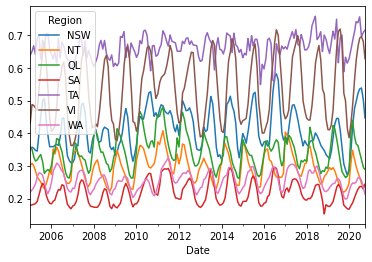

In [207]:
vegetation.plot()

In [208]:
dummy = pd.DataFrame(index = pd.date_range(start = '2020-10-02', end = '2020-10-31'))
vegetation_pivot = pd.concat([vegetation, dummy], axis = 0)
vegetation_pivot

,NSW,NT,QL,SA,TA,VI,WA
2005-01-01,0.349202,0.300478,0.357081,0.179208,0.638585,0.430317,0.219956
2005-01-02,0.349467,0.300725,0.356881,0.179270,0.638951,0.432169,0.220153
2005-01-03,0.349731,0.300971,0.356682,0.179331,0.639316,0.434021,0.220350
2005-01-04,0.349996,0.301218,0.356482,0.179393,0.639681,0.435873,0.220547
2005-01-05,0.350260,0.301464,0.356283,0.179454,0.640047,0.437724,0.220744
...,...,...,...,...,...,...,...
2020-10-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [209]:
vegetation_pivot.fillna(method='ffill', inplace=True)
vegetation_pivot

,NSW,NT,QL,SA,TA,VI,WA
2005-01-01,0.349202,0.300478,0.357081,0.179208,0.638585,0.430317,0.219956
2005-01-02,0.349467,0.300725,0.356881,0.179270,0.638951,0.432169,0.220153
2005-01-03,0.349731,0.300971,0.356682,0.179331,0.639316,0.434021,0.220350
2005-01-04,0.349996,0.301218,0.356482,0.179393,0.639681,0.435873,0.220547
2005-01-05,0.350260,0.301464,0.356283,0.179454,0.640047,0.437724,0.220744
...,...,...,...,...,...,...,...
2020-10-27,0.446502,0.243616,0.289288,0.243616,0.715092,0.627716,0.213640
2020-10-28,0.446502,0.243616,0.289288,0.243616,0.715092,0.627716,0.213640
2020-10-29,0.446502,0.243616,0.289288,0.243616,0.715092,0.627716,0.213640
2020-10-30,0.446502,0.243616,0.289288,0.243616,0.715092,0.627716,0.213640


In [213]:
# _queens_log['vegetation'] = vegetation_pivot['Vegetation_index_mean']
_queens_log = pd.concat([_queens_log, vegetation_pivot], axis=1)

In [214]:
_queens_log

,NSW,NT,QL,SA,TA,VI,WA,month,min_NSW_Precipitation,min_NSW_RelativeHumidity,...,variance_WA_WindSpeed,year_sin,year_cos,NSW,NT,QL,SA,TA,VI,WA
2005-01-01,0.000000,1.598377,3.659234,0.0,0.0,0.000000,3.594088,1,0.0,13.877194,...,1.409677,0.012400,0.999923,0.349202,0.300478,0.357081,0.179208,0.638585,0.430317,0.219956
2005-01-02,0.000000,0.277632,4.166111,0.0,0.0,1.029619,4.997931,1,0.0,20.738882,...,2.707924,0.029599,0.999562,0.349467,0.300725,0.356881,0.179270,0.638951,0.432169,0.220153
2005-01-03,0.000000,4.485711,3.858339,0.0,0.0,0.000000,4.104827,1,0.0,26.145630,...,1.691453,0.046789,0.998905,0.349731,0.300971,0.356682,0.179331,0.639316,0.434021,0.220350
2005-01-04,2.161022,0.000000,3.404525,0.0,0.0,0.000000,4.458689,1,0.0,31.279930,...,0.830894,0.063965,0.997952,0.349996,0.301218,0.356482,0.179393,0.639681,0.435873,0.220547
2005-01-05,2.810080,0.000000,1.386294,0.0,0.0,0.000000,3.446137,1,0.0,24.466665,...,0.754100,0.081122,0.996704,0.350260,0.301464,0.356283,0.179454,0.640047,0.437724,0.220744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-27,0.190620,2.545531,4.365272,0.0,0.0,0.000000,3.495598,10,0.0,17.911118,...,1.743690,-0.900812,0.434210,0.446502,0.243616,0.289288,0.243616,0.715092,0.627716,0.213640
2020-10-28,1.098612,4.976669,4.784225,0.0,0.0,0.693147,3.036904,10,0.0,20.347416,...,2.424646,-0.893209,0.449641,0.446502,0.243616,0.289288,0.243616,0.715092,0.627716,0.213640
2020-10-29,0.000000,3.978977,5.517817,0.0,0.0,0.000000,4.913266,10,0.0,21.098156,...,2.110144,-0.885342,0.464940,0.446502,0.243616,0.289288,0.243616,0.715092,0.627716,0.213640
2020-10-30,0.277632,5.143564,5.643817,0.0,0.0,0.693147,3.747099,10,0.0,23.371044,...,0.970846,-0.877214,0.480100,0.446502,0.243616,0.289288,0.243616,0.715092,0.627716,0.213640


In [63]:
# _queens_log['NT'] = np.log(_queens_log['NT'])

In [215]:
# _queens_log.plot(subplots=True, figsize=(14,20))

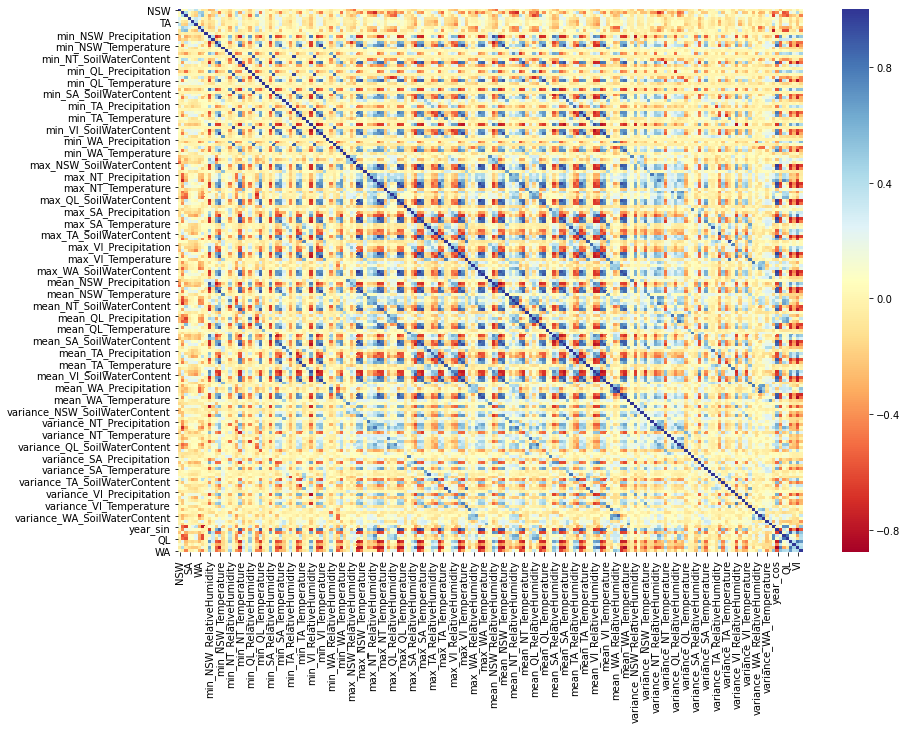

In [216]:
fig, ax = plt.subplots(figsize=(14,10))
sns.heatmap(_queens_log.corr(), cmap='RdYlBu', ax = ax)

In [217]:
# _queens_log['vegetation'].plot()

In [218]:
_queens_log

,NSW,NT,QL,SA,TA,VI,WA,month,min_NSW_Precipitation,min_NSW_RelativeHumidity,...,variance_WA_WindSpeed,year_sin,year_cos,NSW,NT,QL,SA,TA,VI,WA
2005-01-01,0.000000,1.598377,3.659234,0.0,0.0,0.000000,3.594088,1,0.0,13.877194,...,1.409677,0.012400,0.999923,0.349202,0.300478,0.357081,0.179208,0.638585,0.430317,0.219956
2005-01-02,0.000000,0.277632,4.166111,0.0,0.0,1.029619,4.997931,1,0.0,20.738882,...,2.707924,0.029599,0.999562,0.349467,0.300725,0.356881,0.179270,0.638951,0.432169,0.220153
2005-01-03,0.000000,4.485711,3.858339,0.0,0.0,0.000000,4.104827,1,0.0,26.145630,...,1.691453,0.046789,0.998905,0.349731,0.300971,0.356682,0.179331,0.639316,0.434021,0.220350
2005-01-04,2.161022,0.000000,3.404525,0.0,0.0,0.000000,4.458689,1,0.0,31.279930,...,0.830894,0.063965,0.997952,0.349996,0.301218,0.356482,0.179393,0.639681,0.435873,0.220547
2005-01-05,2.810080,0.000000,1.386294,0.0,0.0,0.000000,3.446137,1,0.0,24.466665,...,0.754100,0.081122,0.996704,0.350260,0.301464,0.356283,0.179454,0.640047,0.437724,0.220744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-27,0.190620,2.545531,4.365272,0.0,0.0,0.000000,3.495598,10,0.0,17.911118,...,1.743690,-0.900812,0.434210,0.446502,0.243616,0.289288,0.243616,0.715092,0.627716,0.213640
2020-10-28,1.098612,4.976669,4.784225,0.0,0.0,0.693147,3.036904,10,0.0,20.347416,...,2.424646,-0.893209,0.449641,0.446502,0.243616,0.289288,0.243616,0.715092,0.627716,0.213640
2020-10-29,0.000000,3.978977,5.517817,0.0,0.0,0.000000,4.913266,10,0.0,21.098156,...,2.110144,-0.885342,0.464940,0.446502,0.243616,0.289288,0.243616,0.715092,0.627716,0.213640
2020-10-30,0.277632,5.143564,5.643817,0.0,0.0,0.693147,3.747099,10,0.0,23.371044,...,0.970846,-0.877214,0.480100,0.446502,0.243616,0.289288,0.243616,0.715092,0.627716,0.213640


In [342]:
wildfires = np.exp(wildfires)

In [343]:
_queens_log = wildfires.copy(deep=True)

In [344]:
_queens_log

Estimated_fire_area                                         \
Region                     NSW          NT          QL   SA   TA   VI   
2005-01-01             1.00000    4.945000   38.831579  1.0  1.0  1.0   
2005-01-02             1.00000    1.320000   64.464286  1.0  1.0  2.8   
2005-01-03             1.00000   88.740000   47.386585  1.0  1.0  1.0   
2005-01-04             8.68000    1.000000   30.100000  1.0  1.0  1.0   
2005-01-05            16.61125    1.000000    4.000000  1.0  1.0  1.0   
...                        ...         ...         ...  ...  ...  ...   
2020-10-27             1.21000   12.750000   78.670769  1.0  1.0  1.0   
2020-10-28             3.00000  144.990566  119.608649  1.0  1.0  2.0   
2020-10-29             1.00000   53.462326  249.090625  1.0  1.0  1.0   
2020-10-30             1.32000  171.325280  282.538983  1.0  1.0  2.0   
2020-10-31            20.27600  115.588462  297.627826  1.0  1.0  1.0   

                       Mean_estimated_fire_brightness                          \
Region              WA                            NSW          NT          QL   
2005-01-01   36.382500                     312.266667  314.425000  322.197368   
2005-01-02  148.106471                     312.266667  346.000000  315.991071   
2005-01-03   60.632258                     312.266667  319.446429  333.092683   
2005-01-04   86.374167                     312.266667  323.614286  315.216667   
2005-01-05   31.378947                     322.475000  327.782143  326.412500   
...                ...                            ...         ...         ...   
2020-10-27   32.970000                     311.100000  312.008333  322.305385   
2020-10-28   20.840625                     323.166667  337.718396  320.891892   
2020-10-29  136.083077                     319.133333  332.346512  327.207552   
2020-10-30   42.397895                     315.100000  336.928000  324.786017   
2020-10-31  107.370851                     315.040000  327.117308  321.767150   

            ...                                  \
Region      ...      TA          VI          WA   
2005-01-01  ...  310.75  321.700000  320.146875   
2005-01-02  ...  310.75  321.700000  328.423529   
2005-01-03  ...  310.75  301.550000  328.088710   
2005-01-04  ...  310.75  302.039453  326.426389   
2005-01-05  ...  310.75  302.528906  339.939474   
...         ...     ...         ...         ...   
2020-10-27  ...  315.00  320.387500  324.068182   
2020-10-28  ...  315.00  312.025000  314.425000   
2020-10-29  ...  315.00  314.812500  323.588461   
2020-10-30  ...  315.00  317.600000  324.205263   
2020-10-31  ...  315.00  317.600000  330.057447   

           Mean_estimated_fire_radiative_power                                 \
Region                                     NSW          NT          QL     SA   
2005-01-01                           42.400000   47.500000   45.757895  105.9   
2005-01-02                           42.400000  109.400000   58.492857  105.9   
2005-01-03                           42.400000  278.914286   69.860976  105.9   
2005-01-04                           42.400000  207.265079   31.395833  105.9   
2005-01-05                           62.362500  135.615873   58.150000  105.9   
...                                        ...         ...         ...    ...   
2020-10-27                           16.800000   40.133333   41.896923   80.2   
2020-10-28                           20.566667  116.102830  209.929730   80.2   
2020-10-29                           17.133333   60.288372   56.365104   80.2   
2020-10-30                           13.700000  101.471200   95.176271   80.2   
2020-10-31                           88.460000  218.473077   61.613043   80.2   

                                               
Region              TA         VI          WA  
2005-01-01   76.614286  34.100000  100.750000  
2005-01-02   76.614286  34.100000  578.464706  
2005-01-03   76.614286  13.400000  126.077419  
2005-01-04   76.614286  29.697656  108.791667  
2

In [345]:
import datetime
datetime.datetime.timestamp(pd.to_datetime('2020-01-15')) 

1579064400.0

In [346]:
_jan = (datetime.datetime.timestamp(pd.to_datetime('2020-01-15')) - datetime.datetime.timestamp(pd.to_datetime('2005-01-15'))) / 15
_yearly = _queens_log.index.map(datetime.datetime.timestamp) % _jan
_day_of_year = [15.5, 45, 75.5, 106, 136.5, 167, 197.5, 228.5, 259, 289.5, 320, 350.5]
for i, x in zip(range(1,13), _day_of_year):
    _queens_log['month_{}'.format(i)] = np.exp(-1/(2*50)*(_queens_log.index.dayofyear - x)**2)

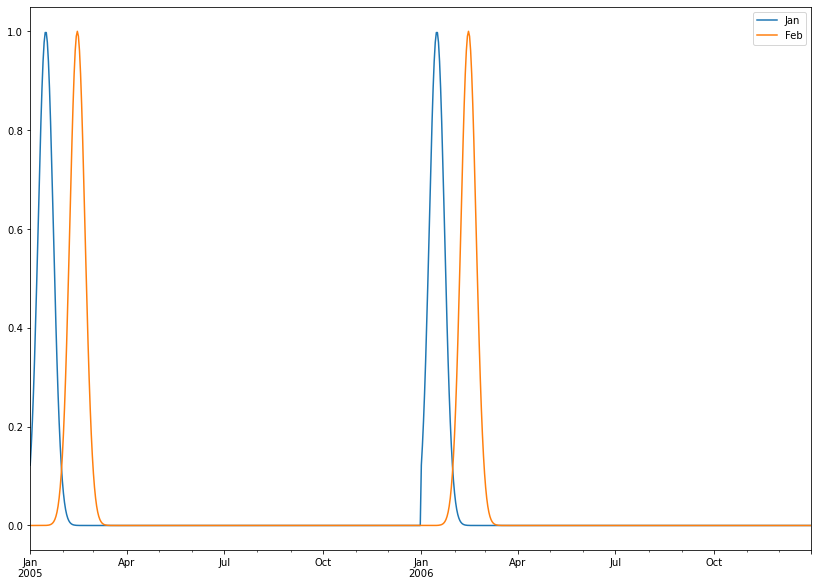

In [350]:
fig, ax = plt.subplots(figsize=(14,10))
_queens_log[:'2006']['month_1'].plot(ax = ax, label = 'Jan')
_queens_log[:'2006']['month_2'].plot(ax = ax, label = 'Feb')
ax.legend();

In [351]:
_queens_log

Estimated_fire_area                                         \
Region                     NSW          NT          QL   SA   TA   VI   
2005-01-01             1.00000    4.945000   38.831579  1.0  1.0  1.0   
2005-01-02             1.00000    1.320000   64.464286  1.0  1.0  2.8   
2005-01-03             1.00000   88.740000   47.386585  1.0  1.0  1.0   
2005-01-04             8.68000    1.000000   30.100000  1.0  1.0  1.0   
2005-01-05            16.61125    1.000000    4.000000  1.0  1.0  1.0   
...                        ...         ...         ...  ...  ...  ...   
2020-10-27             1.21000   12.750000   78.670769  1.0  1.0  1.0   
2020-10-28             3.00000  144.990566  119.608649  1.0  1.0  2.0   
2020-10-29             1.00000   53.462326  249.090625  1.0  1.0  1.0   
2020-10-30             1.32000  171.325280  282.538983  1.0  1.0  2.0   
2020-10-31            20.27600  115.588462  297.627826  1.0  1.0  1.0   

                       Mean_estimated_fire_brightness                          \
Region              WA                            NSW          NT          QL   
2005-01-01   36.382500                     312.266667  314.425000  322.197368   
2005-01-02  148.106471                     312.266667  346.000000  315.991071   
2005-01-03   60.632258                     312.266667  319.446429  333.092683   
2005-01-04   86.374167                     312.266667  323.614286  315.216667   
2005-01-05   31.378947                     322.475000  327.782143  326.412500   
...                ...                            ...         ...         ...   
2020-10-27   32.970000                     311.100000  312.008333  322.305385   
2020-10-28   20.840625                     323.166667  337.718396  320.891892   
2020-10-29  136.083077                     319.133333  332.346512  327.207552   
2020-10-30   42.397895                     315.100000  336.928000  324.786017   
2020-10-31  107.370851                     315.040000  327.117308  321.767150   

            ...        month_3        month_4        month_5        month_6  \
Region      ...                                                               
2005-01-01  ...   7.862679e-25   1.315326e-48   1.829984e-80  2.117447e-120   
2005-01-02  ...   3.454032e-24   1.063430e-47   2.722968e-79  5.798655e-119   
2005-01-03  ...   1.487292e-23   8.427493e-47   3.971474e-78  1.556525e-117   
2005-01-04  ...   6.277408e-23   6.546393e-46   5.677734e-77  4.095426e-116   
2005-01-05  ...   2.597039e-22   4.984480e-45   7.956324e-76  1.056224e-114   
...         ...            ...            ...            ...            ...   
2020-10-27  ...  1.446006e-221  7.236412e-166  3.011809e-118   1.042516e-78   
2020-10-28  ...  1.574560e-223  1.450213e-167  1.110851e-119   7.076698e-80   
2020-10-29  ...  1.680592e-225  2.848751e-169  4.016040e-121   4.708609e-81   
2020-10-30  ...  1.758245e-227  5.485185e-171  1.423162e-122   3.070921e-82   
2020-10-31  ...  1.803062e-229  1.035243e-172  4.943391e-124   1.963174e-83   

                  month_7        month_8        month_9  month_10  month_11  \
Region                                                                        
2005-01-01  2.037647e-168  1.680592e-225  8.245577e-290  0.000000  0.000000   
2005-01-02  1.026983e-166  1.574560e-223  1.421797e-287  0.000000  0.000000   
2005-01-03  5.073548e-165  1.446006e-221  2.403081e-285  0.000000  0.000000   
2005-01-04  2.456826e-163  1.301653e-219  3.981192e-283  0.000000  0.000000   
2005-01-05  1.166141e-161  1.148510e-217  6.465052e-281  0.000000  0.000000   
...                   ...            ...            ...       ...       ...   
2020-10-27   3.001161e-47   1.487292e-23   2.182958e-08  0.266468  0.027052   
2020-10-28   3.749357e-48   3.454032e-24   9.330288e-09  0.209611  0.039164   
2020-10-29   4.591329e-49   7.862679e-25   3.908938e-09  0.161621  0.055576   
2020-10-30   5.511047e-50   1.754401e-25   1.605228e-09  0.122151  0.077305   
2020-10-31   6.484014e-51   3.8

In [352]:
_queens_copy = _queens_log.copy(deep=True)

In [353]:
_queens_copy.reset_index(inplace=True, drop = True)
_queens_copy

Estimated_fire_area                                                     \
Region                 NSW          NT          QL   SA   TA   VI          WA   
0                  1.00000    4.945000   38.831579  1.0  1.0  1.0   36.382500   
1                  1.00000    1.320000   64.464286  1.0  1.0  2.8  148.106471   
2                  1.00000   88.740000   47.386585  1.0  1.0  1.0   60.632258   
3                  8.68000    1.000000   30.100000  1.0  1.0  1.0   86.374167   
4                 16.61125    1.000000    4.000000  1.0  1.0  1.0   31.378947   
...                    ...         ...         ...  ...  ...  ...         ...   
5778               1.21000   12.750000   78.670769  1.0  1.0  1.0   32.970000   
5779               3.00000  144.990566  119.608649  1.0  1.0  2.0   20.840625   
5780               1.00000   53.462326  249.090625  1.0  1.0  1.0  136.083077   
5781               1.32000  171.325280  282.538983  1.0  1.0  2.0   42.397895   
5782              20.27600  115.588462  297.627826  1.0  1.0  1.0  107.370851   

       Mean_estimated_fire_brightness                          ...  \
Region                            NSW          NT          QL  ...   
0                          312.266667  314.425000  322.197368  ...   
1                          312.266667  346.000000  315.991071  ...   
2                          312.266667  319.446429  333.092683  ...   
3                          312.266667  323.614286  315.216667  ...   
4                          322.475000  327.782143  326.412500  ...   
...                               ...         ...         ...  ...   
5778                       311.100000  312.008333  322.305385  ...   
5779                       323.166667  337.718396  320.891892  ...   
5780                       319.133333  332.346512  327.207552  ...   
5781                       315.100000  336.928000  324.786017  ...   
5782                       315.040000  327.117308  321.767150  ...   

              month_3        month_4        month_5        month_6  \
Region                                                               
0        7.862679e-25   1.315326e-48   1.829984e-80  2.117447e-120   
1        3.454032e-24   1.063430e-47   2.722968e-79  5.798655e-119   
2        1.487292e-23   8.427493e-47   3.971474e-78  1.556525e-117   
3        6.277408e-23   6.546393e-46   5.677734e-77  4.095426e-116   
4        2.597039e-22   4.984480e-45   7.956324e-76  1.056224e-114   
...               ...            ...            ...            ...   
5778    1.446006e-221  7.236412e-166  3.011809e-118   1.042516e-78   
5779    1.574560e-223  1.450213e-167  1.110851e-119   7.076698e-80   
5780    1.680592e-225  2.848751e-169  4.016040e-121   4.708609e-81   
5781    1.758245e-227  5.485185e-171  1.423162e-122   3.070921e-82   
5782    1.803062e-229  1.035243e-172  4.943391e-124   1.963174e-83   

              month_7        month_8        month_9  month_10  month_11  \
Region                                                                    
0       2.037647e-168  1.680592e-225  8.245577e-290  0.000000  0.000000   
1       1.026983e-166  1.574560e-223  1.421797e-287  0.000000  0.000000   
2       5.073548e-165  1.446006e-221  2.403081e-285  0.000000  0.000000   
3       2.456826e-163  1.301653e-219  3.981192e-283  0.000000  0.000000   
4       1.166141e-161  1.148510e-217  6.465052e-281  0.000000  0.000000   
...               ...            ...            ...       ...       ...   
5778     3.001161e-47   1.487292e-23   2.182958e-08  0.266468  0.027052   
5779     3.749357e-48   3.454032e-24   9.330288e-09  0.209611  0.039164   
5780     4.591329e-49   7.862679e-25   3.908938e-09  0.161621  0.055576   
5781     5.511047e-50   1.754401e-25   1.605228e-09  0.122151  0.077305   
5782     6.484014e-51   3.837083e-26   6.461432e-10  0.090491  0.105399   

            month_12  
Region                
0       0.000000e+00  
1       0.000000e+00  
2       0.000000e+00  
3       0.000000e+00  
4       0.000000e

In [354]:
for i in _queens_copy.columns:
    _queens_copy[i] = _queens_copy[i].fillna(method='ffill')

In [355]:
_queens_copy.isna().sum()

                                     Region
Estimated_fire_area                  NSW       0
                                     NT        0
                                     QL        0
                                     SA        0
                                     TA        0
                                     VI        0
                                     WA        0
Mean_estimated_fire_brightness       NSW       0
                                     NT        0
                                     QL        0
                                     SA        0
                                     TA        0
                                     VI        0
                                     WA        0
Mean_estimated_fire_radiative_power  NSW       0
                                     NT        0
                                     QL        0
                                     SA        0
                                     TA        0
                         

In [356]:
# _queens_copy.rename(columns = {'NT':'QL'}, inplace=True)

In [357]:
# train_df = _queens_copy.loc[_queens_copy['Date'] <='2018-10-31'].copy(deep=True)
# val_df = _queens_copy.loc[(_queens_copy['Date'] >= '2018-11-01') & (_queens_copy['Date'] <= '2019-10-31')].copy(deep=True)
# test_df = _queens_copy.loc[(_queens_copy['Date'] >= '2019-11-01') & (_queens_copy['Date'] <= '2020-02-29')].copy(deep=True)

n = len(_queens_copy)


train_df = _queens_copy[0:int(n*0.7)].copy(deep=True)
val_df = _queens_copy[int(n*0.7): int(n*0.9)].copy(deep=True)
test_df = _queens_copy[int(n*0.90):].copy(deep=True)

In [358]:
# train_df.drop(columns=['Date'], inplace=True)
# val_df.drop(columns=['Date'], inplace=True)
# test_df.drop(columns=['Date'], inplace=True)

In [359]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
_scaler_train = scaler.fit_transform(train_df)
train_df = pd.DataFrame(data = _scaler_train,
                       index=train_df.index,
                       columns=train_df.columns)
_scaler_val = scaler.transform(val_df)
val_df = pd.DataFrame(data = _scaler_val,
                     index = val_df.index,
                     columns = val_df.columns)

_scaler_test = scaler.transform(test_df)
test_df = pd.DataFrame(data = _scaler_test,
                      index = test_df.index,
                      columns = test_df.columns)


In [367]:
train_df.columns

MultiIndex([(                'Estimated_fire_area', 'NSW'),
            (                'Estimated_fire_area',  'NT'),
            (                'Estimated_fire_area',  'QL'),
            (                'Estimated_fire_area',  'SA'),
            (                'Estimated_fire_area',  'TA'),
            (                'Estimated_fire_area',  'VI'),
            (                'Estimated_fire_area',  'WA'),
            (     'Mean_estimated_fire_brightness', 'NSW'),
            (     'Mean_estimated_fire_brightness',  'NT'),
            (     'Mean_estimated_fire_brightness',  'QL'),
            (     'Mean_estimated_fire_brightness',  'SA'),
            (     'Mean_estimated_fire_brightness',  'TA'),
            (     'Mean_estimated_fire_brightness',  'VI'),
            (     'Mean_estimated_fire_brightness',  'WA'),
            ('Mean_estimated_fire_radiative_power', 'NSW'),
            ('Mean_estimated_fire_radiative_power',  'NT'),
            ('Mean_estimated_fire_radiat

In [368]:
train_df[(                'Estimated_fire_area', 'NSW')]

0       0.000000
1       0.000000
2       0.000000
3       0.003736
4       0.007593
          ...   
4043    0.000000
4044    0.000000
4045    0.000000
4046    0.000000
4047    0.002724
Name: (Estimated_fire_area, NSW), Length: 4048, dtype: float64

In [360]:
# train_df = (train_df - train_df.mean()) / train_df.std()
# val_df = (val_df - train_df.mean()) / train_df.std()
# test_df = (test_df - train_df.mean()) / train_df.std()

In [369]:
class WindowGenerator():
    def __init__(self, input_width, label_width, shift,
                train_df = train_df, val_df = val_df, test_df = test_df,
                label_columns = None):
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df
        
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in enumerate(label_columns)}
        self.column_indices = {name: i for i, name in enumerate(train_df.columns)}
        
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift
        
        self.total_window_size = input_width + shift
        
        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]
        
        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]
        
    
        
    def __repr__(self):
        return '\n'.join([
            'Total window size: {}'.format(self.total_window_size),
            'Total indices: {}'.format(self.input_indices),
            'Label indices: {}'.format(self.label_indices),
            'Label column name(s): {}'.format(self.label_columns)
        ])
    
    def split_window(self, features):
        inputs = features[:, self.input_slice, :]
        labels = features[:, self.labels_slice, :]
        if self.label_columns is not None:
            labels = tf.stack([labels[:, :, self.column_indices[name]] for name in self.label_columns],
                              axis = -1)
            
        inputs.set_shape([None, self.input_width, None])
        labels.set_shape([None, self.label_width, None])
        
        return inputs, labels
    
    def plot(self, model=None, plot_col = (                'Estimated_fire_area', 'NSW'), max_subplots = 3):
        inputs, labels = self.example
        plt.figure(figsize=(12,8))
        plot_col_index = self.column_indices[plot_col]
        max_n = min(max_subplots, len(inputs))
        for n in range(max_n):
            plt.subplot(3, 1, n+1)
            plt.ylabel(f'{plot_col} [normed]')
            plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                    label = 'Inputs', marker='.', zorder = -10)
            if self.label_columns:
                label_col_index = self.label_columns_indices.get(plot_col, None)
            else:
                label_col_index = plot_col_index
            
            if label_col_index is None:
                continue
            
            plt.scatter(self.label_indices, labels[n, :, label_col_index],
                       edgecolors='k', label='Labels', c= '#2ca02c', s= 64)
            
            if model is not None:
                predictions = model(inputs)
                plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                           marker = 'X', edgecolors = 'k', label = 'Predictions',
                           c = '#ff7f0e', s = 64)
                
            if n == 0:
                plt.legend()
        plt.xlabel('Time [D]')
        
        
        
    def make_dataset(self, data):
        data = np.array(data, dtype = np.float32)
        ds = tf.keras.preprocessing.timeseries_dataset_from_array(data = data,
                                                                 targets = None,
                                                                 sequence_length = self.total_window_size,
                                                                 sequence_stride = 1,
                                                                 shuffle = True,
                                                                 batch_size = 128,)
        ds = ds.map(self.split_window)

        return ds
        
        
        
    @property
    def train(self):
        return self.make_dataset(self.train_df)

    @property
    def val(self):
        return self.make_dataset(self.val_df)

    @property
    def test(self):
        return self.make_dataset(self.test_df)

    @property
    def example(self):
        result = getattr(self, '_example', None)
        if result is None:
            result = next(iter(self.train))
            self._example = result

        return result
        
        

In [370]:
w1 = WindowGenerator(input_width = 24, label_width = 1, shift = 24,
                    label_columns = [(                'Estimated_fire_area', 'NSW')])
w1

Total window size: 48
Total indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['QL']

In [373]:
w2 = WindowGenerator(input_width = 6, label_width = 1, shift = 1,
                    label_columns = [(                'Estimated_fire_area', 'NSW')])
w2

Total window size: 7
Total indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): [('Estimated_fire_area', 'NSW')]

In [374]:
train_df.shape

(4048, 33)

In [375]:
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                          np.array(train_df[465:465+w2.total_window_size]),
                          np.array(train_df[930:930+w2.total_window_size])])

In [376]:
example_inputs, example_labels = w2.split_window(example_window)

In [377]:
single_step_window = WindowGenerator(input_width = 1, label_width = 1, shift= 1,
                                    label_columns = [(                'Estimated_fire_area', 'NSW')])
single_step_window

Total window size: 2
Total indices: [0]
Label indices: [1]
Label column name(s): [('Estimated_fire_area', 'NSW')]

In [378]:
column_indices = {name:i for i, name in enumerate(_queens_copy.columns)}

In [379]:
class Baseline(tf.keras.Model):
    def __init__(self, label_index = None):
        super().__init__()
        self.label_index = label_index
        
    def call(self, inputs):
        if self.label_index is None:
            return inputs
        result = inputs[:, :, self.label_index]
        return result[:, :, tf.newaxis]

In [380]:
baseline = Baseline(label_index = column_indices[(                'Estimated_fire_area', 'NSW')])


In [381]:
baseline.compile(loss = tf.losses.MeanSquaredError(),
                metrics = [tf.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose = 0)

10/10 [==============================] - 0s 3ms/step - loss: 6.5541e-04 - mean_absolute_error: 0.0119


In [382]:
wide_window = WindowGenerator(input_width=24, label_width=24, shift = 1,
                             label_columns = [(                'Estimated_fire_area', 'NSW')])

wide_window

Total window size: 25
Total indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): [('Estimated_fire_area', 'NSW')]

In [383]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [384]:
print('Input shape: {}'.format(single_step_window.example[0].shape))
print('Output shape: {}'.format(linear(single_step_window.example[0]).shape))

Input shape: (128, 1, 33)
Output shape: (128, 1, 1)


In [385]:
import keras

In [386]:
initial_learning_rate = 0.01
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate,
                                                            decay_steps = 100000,
                                                            decay_rate = 0.99,
                                                            staircase=True)

In [387]:
MAX_EPOCHS = 100




def compile_and_fit(model, window, patience=2):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

    model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
                metrics=[tf.metrics.MeanAbsoluteError()])

    history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
    return history

In [388]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/100
32/32 [==============================] - 1s 19ms/step - loss: 0.0088 - mean_absolute_error: 0.0701 - val_loss: 0.0032 - val_mean_absolute_error: 0.0433
Epoch 2/100
32/32 [==============================] - 0s 13ms/step - loss: 0.0022 - mean_absolute_error: 0.0337 - val_loss: 0.0012 - val_mean_absolute_error: 0.0237
Epoch 3/100
32/32 [==============================] - 0s 15ms/step - loss: 0.0011 - mean_absolute_error: 0.0206 - val_loss: 9.1589e-04 - val_mean_absolute_error: 0.0215
Epoch 4/100
32/32 [==============================] - 0s 13ms/step - loss: 7.8262e-04 - mean_absolute_error: 0.0157 - val_loss: 6.8005e-04 - val_mean_absolute_error: 0.0165
Epoch 5/100
32/32 [==============================] - 0s 13ms/step - loss: 6.7020e-04 - mean_absolute_error: 0.0130 - val_loss: 6.0394e-04 - val_mean_absolute_error: 0.0124
Epoch 6/100
32/32 [==============================] - 0s 13ms/step - loss: 6.2033e-04 - mean_absolute_error: 0.0113 - val_loss: 5.4620e-04 - val_mean_absolute_er

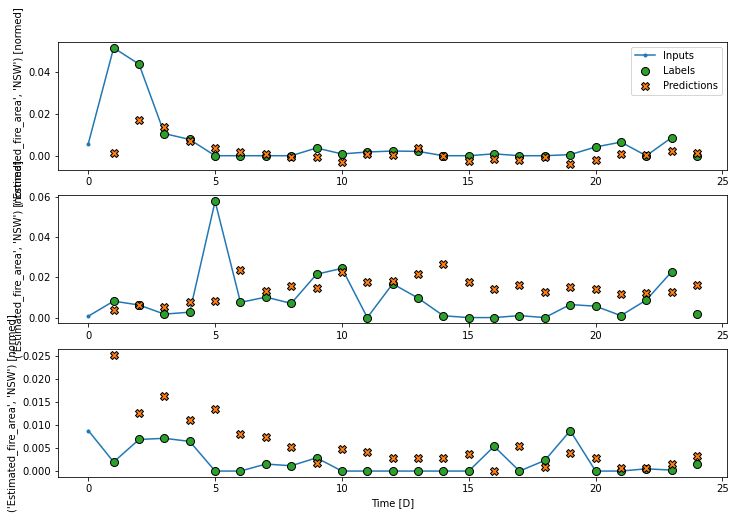

In [389]:
wide_window.plot(linear)

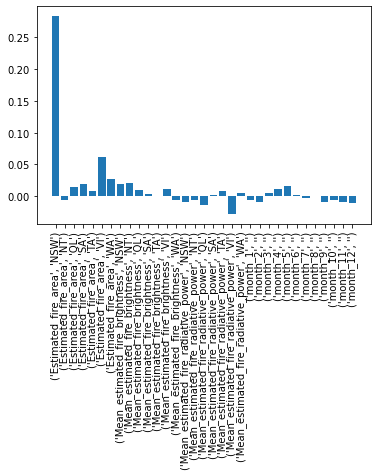

In [390]:
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

In [391]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 64, activation='relu'),
    tf.keras.layers.Dense(units = 64, activation = 'relu'),
    tf.keras.layers.Dense(units = 1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

Epoch 1/100
32/32 [==============================] - 1s 24ms/step - loss: 0.0082 - mean_absolute_error: 0.0507 - val_loss: 8.4155e-04 - val_mean_absolute_error: 0.0143
Epoch 2/100
32/32 [==============================] - 0s 15ms/step - loss: 6.6953e-04 - mean_absolute_error: 0.0113 - val_loss: 7.4646e-04 - val_mean_absolute_error: 0.0130
Epoch 3/100
32/32 [==============================] - 1s 18ms/step - loss: 6.3396e-04 - mean_absolute_error: 0.0107 - val_loss: 6.9145e-04 - val_mean_absolute_error: 0.0123
Epoch 4/100
32/32 [==============================] - 1s 20ms/step - loss: 6.1171e-04 - mean_absolute_error: 0.0104 - val_loss: 6.5573e-04 - val_mean_absolute_error: 0.0120
Epoch 5/100
32/32 [==============================] - 1s 18ms/step - loss: 5.8375e-04 - mean_absolute_error: 0.0100 - val_loss: 6.5205e-04 - val_mean_absolute_error: 0.0117
Epoch 6/100
32/32 [==============================] - 1s 16ms/step - loss: 5.7688e-04 - mean_absolute_error: 0.0099 - val_loss: 6.0636e-04 - val_

In [392]:
performance

{'Baseline': [0.03744075819849968, 0.05615609139204025],
 'Linear': [0.04331983998417854, 0.05848025903105736],
 'Dense': [0.053558047860860825, 0.0642593577504158]}

In [393]:
conv_width = 3
conv_window = WindowGenerator(input_width = conv_width, label_width = 1, shift = 1,
                             label_columns = [(                'Estimated_fire_area', 'NSW')])
conv_window

Total window size: 4
Total indices: [0 1 2]
Label indices: [3]
Label column name(s): [('Estimated_fire_area', 'NSW')]

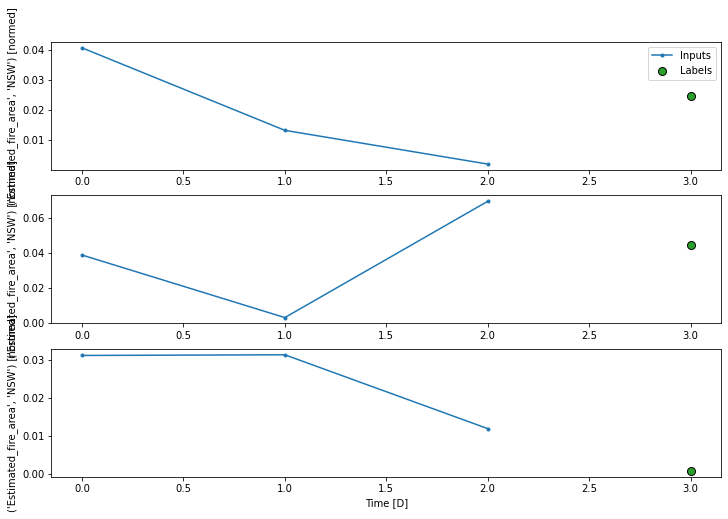

In [394]:
conv_window.plot()

In [395]:
multi_step_dense = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation = 'relu'),
    tf.keras.layers.Dense(units=32, activation = 'relu'),
    tf.keras.layers.Dense(units=1),
    tf.keras.layers.Reshape([1, - 1])
])

In [396]:
print('Input shape: {}'.format(conv_window.example[0].shape))
print('Output shape: {}'.format(multi_step_dense(conv_window.example[0]).shape))

Input shape: (128, 3, 33)
Output shape: (128, 1, 1)


In [397]:
history = compile_and_fit(multi_step_dense, conv_window)

val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)

Epoch 1/100
32/32 [==============================] - 1s 18ms/step - loss: 0.0064 - mean_absolute_error: 0.0481 - val_loss: 9.0888e-04 - val_mean_absolute_error: 0.0146
Epoch 2/100
32/32 [==============================] - 0s 13ms/step - loss: 7.0442e-04 - mean_absolute_error: 0.0118 - val_loss: 8.2270e-04 - val_mean_absolute_error: 0.0134
Epoch 3/100
32/32 [==============================] - 0s 12ms/step - loss: 6.6033e-04 - mean_absolute_error: 0.0113 - val_loss: 7.8644e-04 - val_mean_absolute_error: 0.0135
Epoch 4/100
32/32 [==============================] - 0s 14ms/step - loss: 6.5106e-04 - mean_absolute_error: 0.0112 - val_loss: 7.7176e-04 - val_mean_absolute_error: 0.0134
Epoch 5/100
32/32 [==============================] - 0s 13ms/step - loss: 6.4570e-04 - mean_absolute_error: 0.0111 - val_loss: 7.5827e-04 - val_mean_absolute_error: 0.0131
Epoch 6/100
32/32 [==============================] - 0s 14ms/step - loss: 6.3964e-04 - mean_absolute_error: 0.0111 - val_loss: 7.2860e-04 - val_

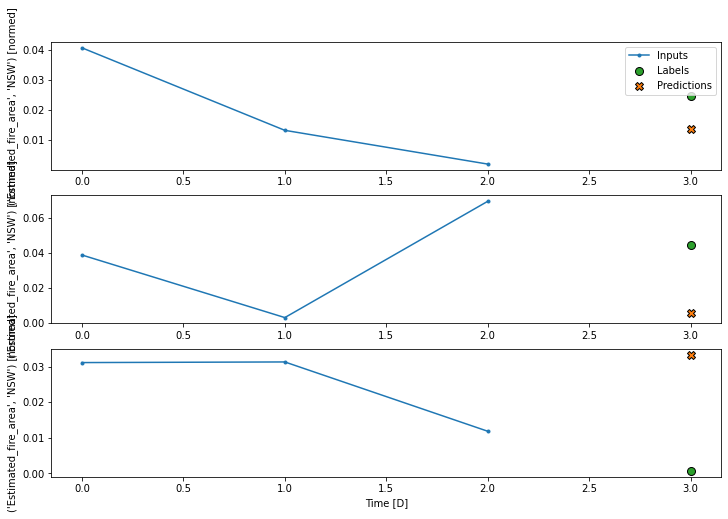

In [398]:
conv_window.plot(multi_step_dense)

In [399]:
print('Input shape: {}'.format(wide_window.example[0].shape))
try:
    print('Output shape: {}'.format(multi_step_dense(wide_window.example[0]).shape))
except Exception as e:
    print(f'\n{type(e).__name__}:{e}')

Input shape: (128, 24, 33)

InvalidArgumentError:Matrix size-incompatible: In[0]: [128,792], In[1]: [99,32] [Op:MatMul]


In [400]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters = 32,
                          kernel_size=(conv_width,),
                          activation = 'relu'),
    tf.keras.layers.Dense(units=32, activation = 'relu'),
    tf.keras.layers.Dense(units=1),
])

In [401]:
print('Conv model on conv_window')
print('Input shape: {}'.format(conv_window.example[0].shape))
print('Output shape: {}'.format(conv_model(conv_window.example[0]).shape))

Conv model on conv_window
Input shape: (128, 3, 33)
Output shape: (128, 1, 1)


In [402]:
history = compile_and_fit(conv_model, conv_window)

val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

Epoch 1/100
32/32 [==============================] - 1s 25ms/step - loss: 0.0038 - mean_absolute_error: 0.0332 - val_loss: 8.1992e-04 - val_mean_absolute_error: 0.0142
Epoch 2/100
32/32 [==============================] - 1s 16ms/step - loss: 6.6885e-04 - mean_absolute_error: 0.0119 - val_loss: 7.3113e-04 - val_mean_absolute_error: 0.0136
Epoch 3/100
32/32 [==============================] - 1s 16ms/step - loss: 6.6898e-04 - mean_absolute_error: 0.0121 - val_loss: 6.9690e-04 - val_mean_absolute_error: 0.0137
Epoch 4/100
32/32 [==============================] - 1s 16ms/step - loss: 6.4608e-04 - mean_absolute_error: 0.0112 - val_loss: 6.7631e-04 - val_mean_absolute_error: 0.0142
Epoch 5/100
32/32 [==============================] - 0s 15ms/step - loss: 6.2857e-04 - mean_absolute_error: 0.0110 - val_loss: 6.7062e-04 - val_mean_absolute_error: 0.0152
Epoch 6/100
32/32 [==============================] - 1s 16ms/step - loss: 6.3549e-04 - mean_absolute_error: 0.0121 - val_loss: 6.5268e-04 - val_

In [403]:
performance

{'Baseline': [0.03744075819849968, 0.05615609139204025],
 'Linear': [0.04331983998417854, 0.05848025903105736],
 'Dense': [0.053558047860860825, 0.0642593577504158],
 'Multi step dense': [0.05561859905719757, 0.06825371831655502],
 'Conv': [0.05564308166503906, 0.0674196183681488]}

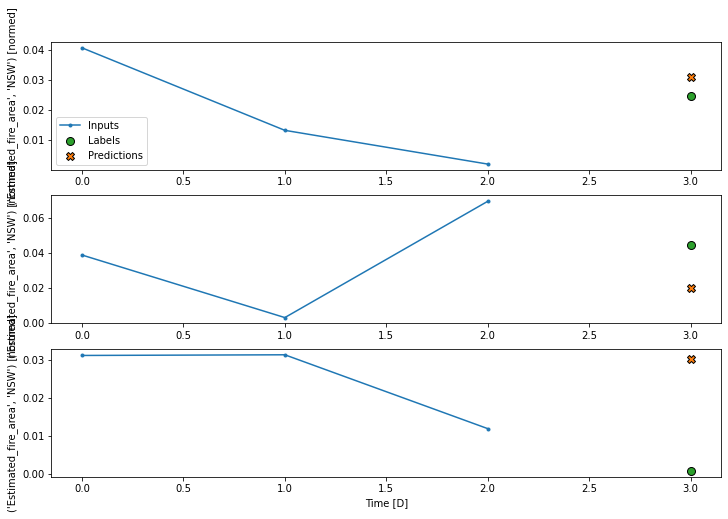

In [404]:
conv_window.plot(conv_model)

In [405]:
print('Wide window')
print('Input shape: {}'.format(wide_window.example[0].shape))
print('Labels shape: {}'.format(wide_window.example[1].shape))
print('Output shape: {}'.format(conv_model(wide_window.example[0]).shape))

Wide window
Input shape: (128, 24, 33)
Labels shape: (128, 24, 1)
Output shape: (128, 22, 1)


In [406]:
label_width = 24
input_width = label_width + (conv_width - 1)
wide_conv_window = WindowGenerator(input_width = input_width,
                                  label_width = label_width,
                                  shift = 1,
                                  label_columns = [(                'Estimated_fire_area', 'NSW')])
wide_conv_window

Total window size: 27
Total indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
Label indices: [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26]
Label column name(s): [('Estimated_fire_area', 'NSW')]

In [407]:
print('Wide window')
print('Input shape: {}'.format(wide_conv_window.example[0].shape))
print('Labels shape: {}'.format(wide_conv_window.example[1].shape))
print('Output shape: {}'.format(conv_model(wide_conv_window.example[0]).shape))

Wide window
Input shape: (128, 26, 33)
Labels shape: (128, 24, 1)
Output shape: (128, 24, 1)


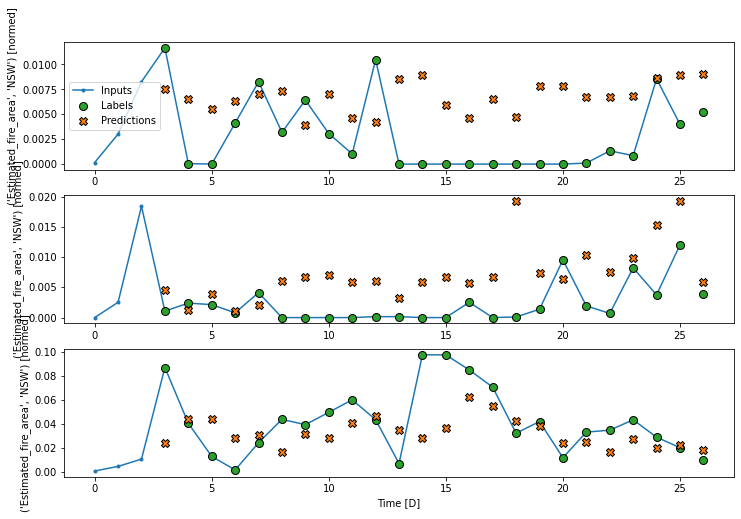

In [408]:
wide_conv_window.plot(conv_model)

In [409]:
lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(units=1)
])

In [410]:
print('Input shape: {}'.format(wide_window.example[0].shape))
print('Output shape: {}'.format(lstm_model(wide_window.example[0]).shape))

Input shape: (128, 24, 33)
Output shape: (128, 24, 1)


In [411]:
history = compile_and_fit(lstm_model, wide_window)

val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose = 0)

Epoch 1/100
32/32 [==============================] - 2s 48ms/step - loss: 0.0059 - mean_absolute_error: 0.0486 - val_loss: 0.0010 - val_mean_absolute_error: 0.0187
Epoch 2/100
32/32 [==============================] - 1s 24ms/step - loss: 7.0608e-04 - mean_absolute_error: 0.0133 - val_loss: 6.7456e-04 - val_mean_absolute_error: 0.0128
Epoch 3/100
32/32 [==============================] - 1s 24ms/step - loss: 6.1131e-04 - mean_absolute_error: 0.0111 - val_loss: 6.6020e-04 - val_mean_absolute_error: 0.0121
Epoch 4/100
32/32 [==============================] - 1s 23ms/step - loss: 5.8924e-04 - mean_absolute_error: 0.0105 - val_loss: 6.1828e-04 - val_mean_absolute_error: 0.0119
Epoch 5/100
32/32 [==============================] - 1s 19ms/step - loss: 5.7548e-04 - mean_absolute_error: 0.0101 - val_loss: 5.9836e-04 - val_mean_absolute_error: 0.0117
Epoch 6/100
32/32 [==============================] - 1s 19ms/step - loss: 5.6557e-04 - mean_absolute_error: 0.0100 - val_loss: 5.8056e-04 - val_mean

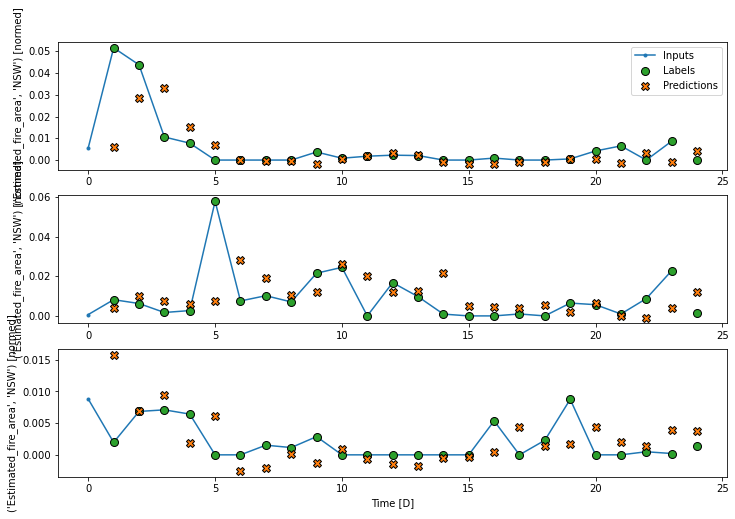

In [412]:
wide_window.plot(lstm_model)

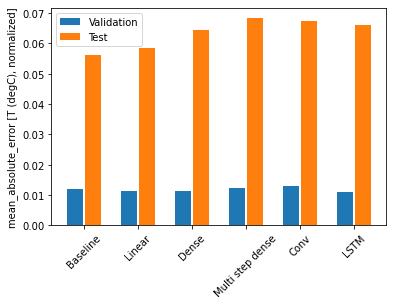

In [413]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [T (degC), normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

In [414]:
for name, value in performance.items():
  print(f'{name:12s}: {value[1]:0.4f}')

Baseline    : 0.0562
Linear      : 0.0585
Dense       : 0.0643
Multi step dense: 0.0683
Conv        : 0.0674
LSTM        : 0.0661


In [415]:
single_step_window = WindowGenerator(input_width = 1, label_width = 1, shift=1)
wide_window = WindowGenerator(input_width = 24, label_width = 24, shift = 1)

for example_inputs, example_labels in wide_window.train.take(1):
    print('Inputs shape (batch, time, features): {}'.format(example_labels.shape))
    print('Labels shape (batch, time, features): {}'.format(example_labels.shape))

Inputs shape (batch, time, features): (128, 24, 33)
Labels shape (batch, time, features): (128, 24, 33)


In [416]:
baseline = Baseline()
baseline.compile(loss = tf.losses.MeanSquaredError(),
                metrics = [tf.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(wide_window.val)
performance['Baseline'] = baseline.evaluate(wide_window.test, verbose=0)

9/9 [==============================] - 0s 4ms/step - loss: 0.0040 - mean_absolute_error: 0.0277


In [417]:
num_features = train_df.shape[1]

In [418]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 64, activation = 'relu'),
    tf.keras.layers.Dense(units = 64, activation = 'relu'),
    tf.keras.layers.Dense(units = num_features)
])

In [419]:
history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose = 0)


Epoch 1/100
32/32 [==============================] - 1s 22ms/step - loss: 0.0129 - mean_absolute_error: 0.0693 - val_loss: 0.0050 - val_mean_absolute_error: 0.0483
Epoch 2/100
32/32 [==============================] - 1s 16ms/step - loss: 0.0040 - mean_absolute_error: 0.0408 - val_loss: 0.0034 - val_mean_absolute_error: 0.0360
Epoch 3/100
32/32 [==============================] - 1s 16ms/step - loss: 0.0033 - mean_absolute_error: 0.0348 - val_loss: 0.0031 - val_mean_absolute_error: 0.0340
Epoch 4/100
32/32 [==============================] - 1s 16ms/step - loss: 0.0031 - mean_absolute_error: 0.0328 - val_loss: 0.0030 - val_mean_absolute_error: 0.0330
Epoch 5/100
32/32 [==============================] - 1s 18ms/step - loss: 0.0030 - mean_absolute_error: 0.0322 - val_loss: 0.0029 - val_mean_absolute_error: 0.0323
Epoch 6/100
32/32 [==============================] - 1s 16ms/step - loss: 0.0030 - mean_absolute_error: 0.0316 - val_loss: 0.0029 - val_mean_absolute_error: 0.0313
Epoch 7/100
32/3

In [420]:
wide_window = WindowGenerator(input_width=24, label_width = 24, shift = 1)
lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(units = num_features)
])

history = compile_and_fit(lstm_model, wide_window)

val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

Epoch 1/100
32/32 [==============================] - 1s 41ms/step - loss: 0.0161 - mean_absolute_error: 0.0767 - val_loss: 0.0072 - val_mean_absolute_error: 0.0565
Epoch 2/100
32/32 [==============================] - 1s 20ms/step - loss: 0.0053 - mean_absolute_error: 0.0467 - val_loss: 0.0040 - val_mean_absolute_error: 0.0393
Epoch 3/100
32/32 [==============================] - 1s 19ms/step - loss: 0.0038 - mean_absolute_error: 0.0375 - val_loss: 0.0034 - val_mean_absolute_error: 0.0357
Epoch 4/100
32/32 [==============================] - 1s 22ms/step - loss: 0.0033 - mean_absolute_error: 0.0344 - val_loss: 0.0031 - val_mean_absolute_error: 0.0331
Epoch 5/100
32/32 [==============================] - 1s 20ms/step - loss: 0.0031 - mean_absolute_error: 0.0320 - val_loss: 0.0029 - val_mean_absolute_error: 0.0312
Epoch 6/100
32/32 [==============================] - 1s 20ms/step - loss: 0.0029 - mean_absolute_error: 0.0303 - val_loss: 0.0028 - val_mean_absolute_error: 0.0299
Epoch 7/100
32/3

In [421]:
class ResidualWrapper(tf.keras.Model):
    def __init__(self, model):
        super().__init__()
        self.model = model
    
    def call(self, inputs, *args, **kwargs):
        delta = self.model(inputs, *args, **kwargs)
        
        
        return inputs + delta

In [96]:
residual_lstm = ResidualWrapper(
    tf.keras.Sequential([
        tf.keras.layers.LSTM(32, return_sequences=True),
        tf.keras.layers.Dense(
        num_features, kernel_initializer=tf.initializers.zeros)
    ]))

history = compile_and_fit(residual_lstm, wide_window)

val_performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.val)
performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.test, verbose = 0)

Epoch 1/100
32/32 [==============================] - 1s 40ms/step - loss: 0.0073 - mean_absolute_error: 0.0399 - val_loss: 0.0070 - val_mean_absolute_error: 0.0402
Epoch 2/100
32/32 [==============================] - 1s 21ms/step - loss: 0.0063 - mean_absolute_error: 0.0386 - val_loss: 0.0064 - val_mean_absolute_error: 0.0397
Epoch 3/100
32/32 [==============================] - 1s 19ms/step - loss: 0.0059 - mean_absolute_error: 0.0381 - val_loss: 0.0063 - val_mean_absolute_error: 0.0398
Epoch 4/100
32/32 [==============================] - 1s 20ms/step - loss: 0.0058 - mean_absolute_error: 0.0378 - val_loss: 0.0062 - val_mean_absolute_error: 0.0392
Epoch 5/100
32/32 [==============================] - 1s 19ms/step - loss: 0.0057 - mean_absolute_error: 0.0377 - val_loss: 0.0063 - val_mean_absolute_error: 0.0395
Epoch 6/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0397


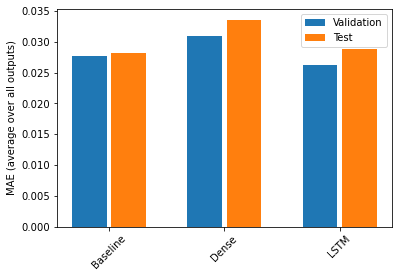

In [422]:
x = np.arange(len(performance))
width = 0.3

metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
plt.ylabel('MAE (average over all outputs)')
_ = plt.legend()

In [423]:
for name, value in performance.items():
  print(f'{name:15s}: {value[1]:0.4f}')

Baseline       : 0.0282
Dense          : 0.0336
LSTM           : 0.0288


Total window size: 242
Total indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120]
Label indices: [121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138
 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156
 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174
 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192
 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210
 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228
 229 230 231 232 

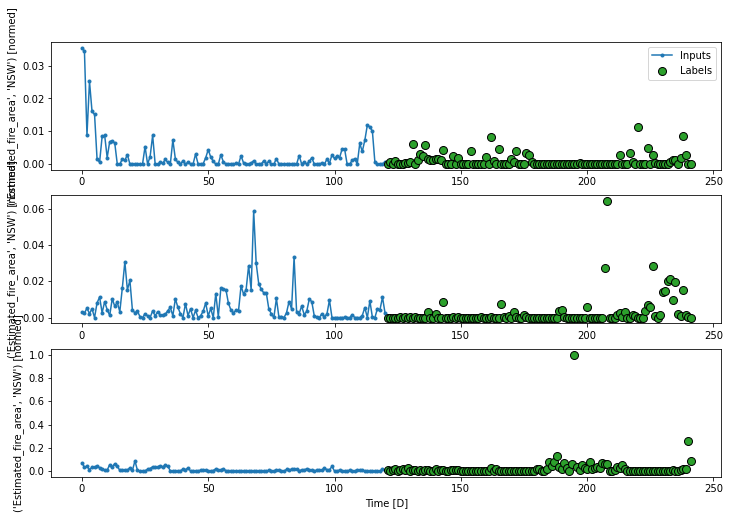

In [424]:
out_steps = 121
multi_window = WindowGenerator(input_width = 121,
                              label_width = out_steps,
                              shift = out_steps)
multi_window.plot()
multi_window

In [425]:
multi_window

Total window size: 242
Total indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120]
Label indices: [121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138
 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156
 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174
 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192
 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210
 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228
 229 230 231 232 

8/8 [==============================] - 0s 7ms/step - loss: 0.0292 - mean_absolute_error: 0.0720


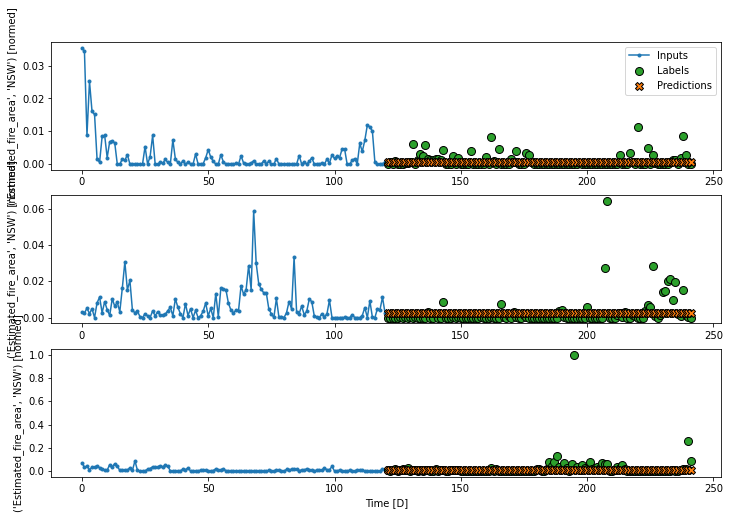

In [426]:
class MultiStepLastBaseline(tf.keras.Model):
    def call(self, inputs):
        return tf.tile(inputs[:, -1:, :], [1, out_steps, 1])
    
last_baseline = MultiStepLastBaseline()
last_baseline.compile(loss=tf.losses.MeanSquaredError(),
                     metrics = [tf.metrics.MeanAbsoluteError()])

multi_val_performance = {}
multi_performance = {}

multi_val_performance['Last'] = last_baseline.evaluate(multi_window.val)
multi_performance['Last'] = last_baseline.evaluate(multi_window.test, verbose=0)

multi_window.plot(last_baseline)

In [427]:
last_baseline.evaluate(multi_window.test, verbose=0)

[0.03640372306108475, 0.08086875081062317]

In [428]:
multi_window.test

<MapDataset shapes: ((None, 121, 33), (None, 121, 33)), types: (tf.float32, tf.float32)>

8/8 [==============================] - 0s 8ms/step - loss: 0.0329 - mean_absolute_error: 0.0800


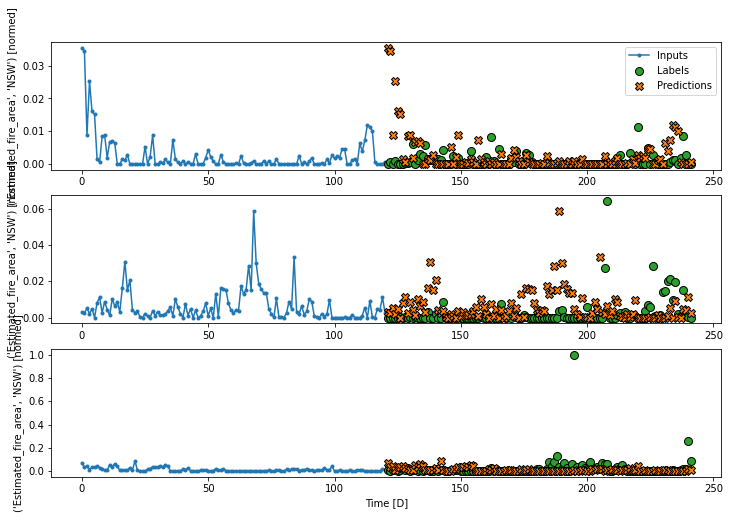

In [429]:
class RepeatBaseline(tf.keras.Model):
    def call(self, inputs):
        return inputs
    
repeat_baseline = RepeatBaseline()
repeat_baseline.compile(loss=tf.losses.MeanSquaredError(),
                       metrics = [tf.metrics.MeanAbsoluteError()])

multi_val_performance['Repeat'] = repeat_baseline.evaluate(multi_window.val)
multi_performance['Repeat'] = repeat_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(repeat_baseline)

In [430]:
multi_performance

{'Last': [0.036403726786375046, 0.08086875081062317],
 'Repeat': [0.04208534583449364, 0.09175381064414978]}

In [431]:
multi_window.test

<MapDataset shapes: ((None, 121, 33), (None, 121, 33)), types: (tf.float32, tf.float32)>

Epoch 1/100
30/30 [==============================] - 1s 27ms/step - loss: 0.0177 - mean_absolute_error: 0.0700 - val_loss: 0.0111 - val_mean_absolute_error: 0.0556
Epoch 2/100
30/30 [==============================] - 1s 23ms/step - loss: 0.0102 - mean_absolute_error: 0.0554 - val_loss: 0.0094 - val_mean_absolute_error: 0.0539
Epoch 3/100
30/30 [==============================] - 1s 21ms/step - loss: 0.0092 - mean_absolute_error: 0.0533 - val_loss: 0.0089 - val_mean_absolute_error: 0.0516
Epoch 4/100
30/30 [==============================] - 1s 23ms/step - loss: 0.0088 - mean_absolute_error: 0.0511 - val_loss: 0.0086 - val_mean_absolute_error: 0.0499
Epoch 5/100
30/30 [==============================] - 1s 21ms/step - loss: 0.0086 - mean_absolute_error: 0.0495 - val_loss: 0.0085 - val_mean_absolute_error: 0.0486
Epoch 6/100
30/30 [==============================] - 1s 23ms/step - loss: 0.0085 - mean_absolute_error: 0.0488 - val_loss: 0.0084 - val_mean_absolute_error: 0.0484
Epoch 7/100
30/3

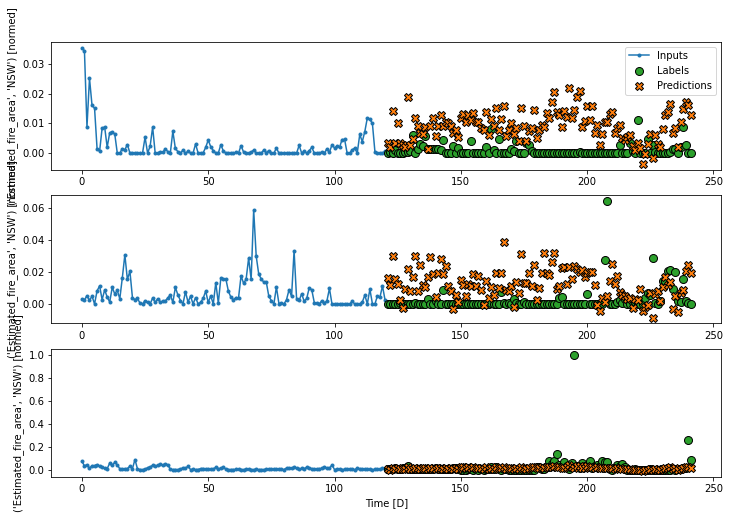

In [432]:
multi_linear_model = tf.keras.Sequential([
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    tf.keras.layers.Dense(out_steps * num_features,
                         kernel_initializer = tf.initializers.zeros),
    tf.keras.layers.Reshape([out_steps, num_features])
])

history = compile_and_fit(multi_linear_model, multi_window)

multi_val_performance['Linear'] = multi_linear_model.evaluate(multi_window.val)
multi_performance['Linear'] = multi_linear_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_linear_model)


In [433]:
multi_performance

{'Last': [0.036403726786375046, 0.08086875081062317],
 'Repeat': [0.04208534583449364, 0.09175381064414978],
 'Linear': [0.013631527312099934, 0.05709599703550339]}

Epoch 1/100
30/30 [==============================] - 1s 34ms/step - loss: 0.0139 - mean_absolute_error: 0.0624 - val_loss: 0.0083 - val_mean_absolute_error: 0.0480
Epoch 2/100
30/30 [==============================] - 1s 24ms/step - loss: 0.0082 - mean_absolute_error: 0.0474 - val_loss: 0.0077 - val_mean_absolute_error: 0.0463
Epoch 3/100
30/30 [==============================] - 1s 25ms/step - loss: 0.0076 - mean_absolute_error: 0.0460 - val_loss: 0.0072 - val_mean_absolute_error: 0.0459
Epoch 4/100
30/30 [==============================] - 1s 24ms/step - loss: 0.0070 - mean_absolute_error: 0.0446 - val_loss: 0.0068 - val_mean_absolute_error: 0.0451
Epoch 5/100
30/30 [==============================] - 1s 24ms/step - loss: 0.0066 - mean_absolute_error: 0.0440 - val_loss: 0.0067 - val_mean_absolute_error: 0.0448
Epoch 6/100
30/30 [==============================] - 1s 25ms/step - loss: 0.0064 - mean_absolute_error: 0.0442 - val_loss: 0.0066 - val_mean_absolute_error: 0.0458
Epoch 7/100
30/3

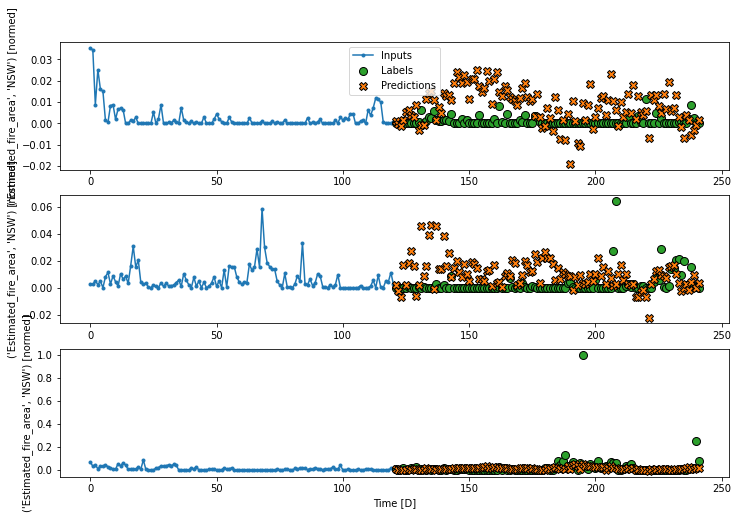

In [434]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(out_steps * num_features,
                         kernel_initializer = tf.initializers.zeros),
    tf.keras.layers.Reshape([out_steps, num_features])
])

history = compile_and_fit(multi_dense_model, multi_window)

multi_val_performance['Dense'] = multi_dense_model.evaluate(multi_window.val)
multi_performance['Dense'] = multi_dense_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_dense_model)

Epoch 1/100
30/30 [==============================] - 2s 50ms/step - loss: 0.0203 - mean_absolute_error: 0.0745 - val_loss: 0.0150 - val_mean_absolute_error: 0.0607
Epoch 2/100
30/30 [==============================] - 1s 27ms/step - loss: 0.0146 - mean_absolute_error: 0.0617 - val_loss: 0.0129 - val_mean_absolute_error: 0.0607
Epoch 3/100
30/30 [==============================] - 1s 26ms/step - loss: 0.0114 - mean_absolute_error: 0.0571 - val_loss: 0.0094 - val_mean_absolute_error: 0.0521
Epoch 4/100
30/30 [==============================] - 1s 26ms/step - loss: 0.0086 - mean_absolute_error: 0.0499 - val_loss: 0.0077 - val_mean_absolute_error: 0.0469
Epoch 5/100
30/30 [==============================] - 1s 25ms/step - loss: 0.0077 - mean_absolute_error: 0.0463 - val_loss: 0.0072 - val_mean_absolute_error: 0.0457
Epoch 6/100
30/30 [==============================] - 1s 26ms/step - loss: 0.0072 - mean_absolute_error: 0.0460 - val_loss: 0.0068 - val_mean_absolute_error: 0.0461
Epoch 7/100
30/3

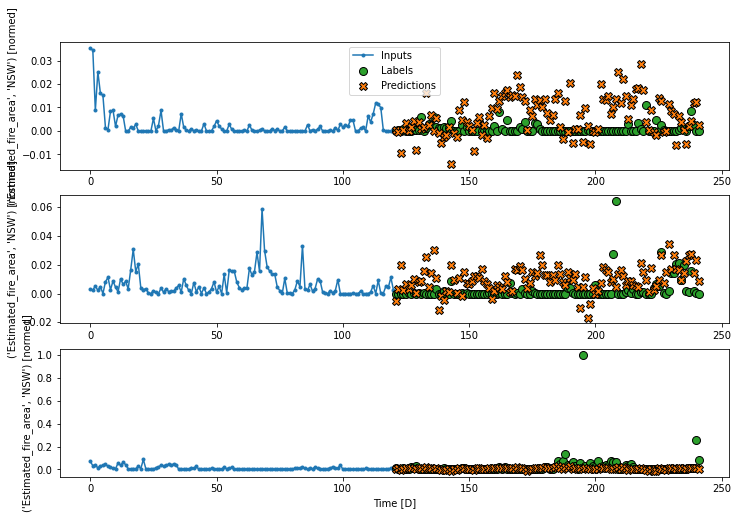

In [435]:
conv_width = 3
# tf.keras.backend.clear_sesion()
multi_conv_model = tf.keras.Sequential([
    tf.keras.layers.Lambda(lambda x: x[:, -conv_width:, :]),
    tf.keras.layers.Conv1D(256, activation = 'relu', kernel_size=(conv_width,)),
    tf.keras.layers.LSTM(32, return_sequences = True),


    tf.keras.layers.Dense(out_steps * num_features,
                         kernel_initializer = tf.initializers.zeros),

    tf.keras.layers.Reshape([out_steps, num_features])
])


# conv_model = tf.keras.Sequential([
#     tf.keras.layers.Conv1D(filters = 32,
#                           kernel_size=(conv_width,),
#                           activation = 'relu'),
#     tf.keras.layers.Dense(units=32, activation = 'relu'),
#     tf.keras.layers.Dense(units=1),
# ])

history = compile_and_fit(multi_conv_model, multi_window)

multi_val_performance['Conv'] = multi_conv_model.evaluate(multi_window.val)
multi_performance['Conv'] = multi_conv_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_conv_model)

Epoch 1/100
30/30 [==============================] - 2s 53ms/step - loss: 0.0038 - mean_absolute_error: 0.0361 - val_loss: 0.0035 - val_mean_absolute_error: 0.0345
Epoch 2/100
30/30 [==============================] - 1s 24ms/step - loss: 0.0035 - mean_absolute_error: 0.0332 - val_loss: 0.0034 - val_mean_absolute_error: 0.0334
Epoch 3/100
30/30 [==============================] - 1s 26ms/step - loss: 0.0035 - mean_absolute_error: 0.0328 - val_loss: 0.0034 - val_mean_absolute_error: 0.0334
Epoch 4/100
8/8 [==============================] - 0s 11ms/step - loss: 0.0034 - mean_absolute_error: 0.0335


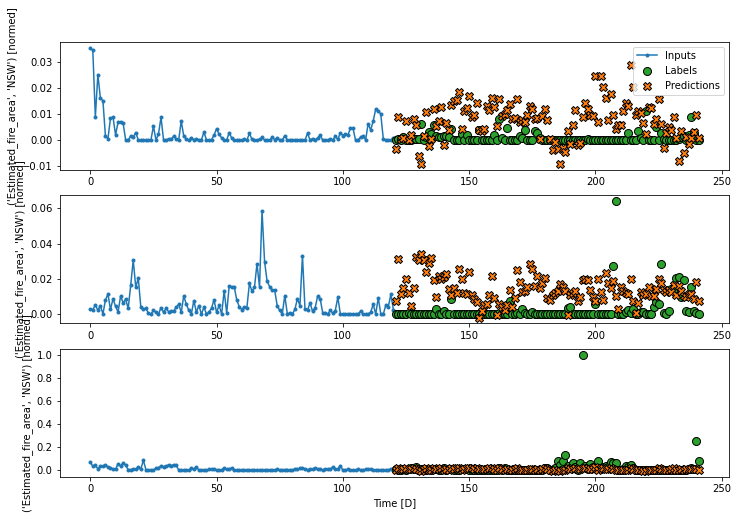

In [436]:
history = compile_and_fit(multi_conv_model, multi_window)

multi_val_performance['Conv'] = multi_conv_model.evaluate(multi_window.val)
multi_performance['Conv'] = multi_conv_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_conv_model)

In [437]:
multi_performance

{'Last': [0.036403726786375046, 0.08086875081062317],
 'Repeat': [0.04208534583449364, 0.09175381064414978],
 'Linear': [0.013631527312099934, 0.05709599703550339],
 'Dense': [0.01122258510440588, 0.05296754837036133],
 'Conv': [0.007603363133966923, 0.03983010724186897]}

Epoch 1/100
30/30 [==============================] - 2s 57ms/step - loss: 0.0175 - mean_absolute_error: 0.0704 - val_loss: 0.0115 - val_mean_absolute_error: 0.0604
Epoch 2/100
30/30 [==============================] - 1s 35ms/step - loss: 0.0095 - mean_absolute_error: 0.0553 - val_loss: 0.0076 - val_mean_absolute_error: 0.0493
Epoch 3/100
30/30 [==============================] - 1s 34ms/step - loss: 0.0070 - mean_absolute_error: 0.0478 - val_loss: 0.0059 - val_mean_absolute_error: 0.0469
Epoch 4/100
30/30 [==============================] - 1s 34ms/step - loss: 0.0054 - mean_absolute_error: 0.0455 - val_loss: 0.0047 - val_mean_absolute_error: 0.0434
Epoch 5/100
30/30 [==============================] - 1s 36ms/step - loss: 0.0045 - mean_absolute_error: 0.0414 - val_loss: 0.0041 - val_mean_absolute_error: 0.0400
Epoch 6/100
30/30 [==============================] - 1s 36ms/step - loss: 0.0041 - mean_absolute_error: 0.0388 - val_loss: 0.0039 - val_mean_absolute_error: 0.0383
Epoch 7/100
30/3

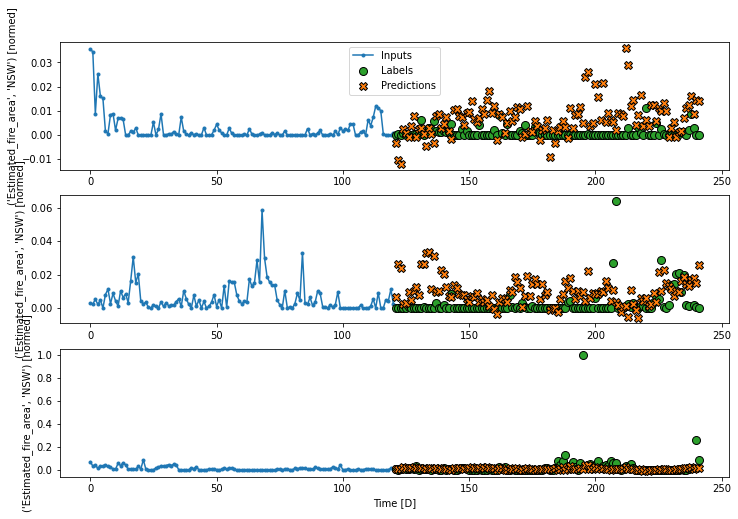

In [438]:
multi_lstm_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(32, return_sequences = False),
    tf.keras.layers.Dense(out_steps * num_features,
                         kernel_initializer = tf.initializers.zeros),
    tf.keras.layers.Reshape([out_steps, num_features]),
])


history = compile_and_fit(multi_lstm_model, multi_window)

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose = 0)
multi_window.plot(multi_lstm_model)

In [439]:
multi_performance

{'Last': [0.036403726786375046, 0.08086875081062317],
 'Repeat': [0.04208534583449364, 0.09175381064414978],
 'Linear': [0.013631527312099934, 0.05709599703550339],
 'Dense': [0.01122258510440588, 0.05296754837036133],
 'Conv': [0.007603363133966923, 0.03983010724186897],
 'LSTM': [0.007675194181501865, 0.04105843976140022]}

In [440]:
class FeedBack(tf.keras.Model):
    def __init__(self, units, out_steps):
        super().__init__()
        self.out_steps = out_steps
        self.units = units
        self.lstm_cell = tf.keras.layers.LSTMCell(units)
        
        self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state = True)
        self.dense = tf.keras.layers.Dense(num_features)
        
        
    def warmup(self, inputs):
        x, *state = self.lstm_rnn(inputs)
        
        prediction = self.dense(x)
        return prediction, state
    
    
    def call(self, inputs, training=None):
        predictions = []

        prediction, state = self.warmup(inputs)

        predictions.append(prediction)
        for n in range(1, self.out_steps):
            x = prediction
            x, state = self.lstm_cell(x, states= state,
                                     training = training)
            prediction = self.dense(x)
            predictions.append(prediction)

        predictions = tf.stack(predictions)

        predictions = tf.transpose(predictions, [1, 0 ,2])

        return predictions

In [441]:
feedback_model = FeedBack(units=32, out_steps = out_steps)



In [442]:
prediction, state = feedback_model.warmup(multi_window.example[0])
prediction.shape

TensorShape([128, 33])

In [443]:
print('Output shape (batch, time features): {}'.format(feedback_model(multi_window.example[0]).shape))

Output shape (batch, time features): (128, 121, 33)


Epoch 1/100
30/30 [==============================] - 23s 782ms/step - loss: 0.0223 - mean_absolute_error: 0.0832 - val_loss: 0.0158 - val_mean_absolute_error: 0.0633
Epoch 2/100
30/30 [==============================] - 19s 646ms/step - loss: 0.0161 - mean_absolute_error: 0.0650 - val_loss: 0.0156 - val_mean_absolute_error: 0.0631
Epoch 3/100
30/30 [==============================] - 19s 622ms/step - loss: 0.0161 - mean_absolute_error: 0.0647 - val_loss: 0.0155 - val_mean_absolute_error: 0.0632
Epoch 4/100
30/30 [==============================] - 19s 623ms/step - loss: 0.0160 - mean_absolute_error: 0.0646 - val_loss: 0.0155 - val_mean_absolute_error: 0.0633
Epoch 5/100
30/30 [==============================] - 18s 616ms/step - loss: 0.0160 - mean_absolute_error: 0.0645 - val_loss: 0.0154 - val_mean_absolute_error: 0.0632
Epoch 6/100
30/30 [==============================] - 18s 617ms/step - loss: 0.0160 - mean_absolute_error: 0.0645 - val_loss: 0.0155 - val_mean_absolute_error: 0.0624
Epoc

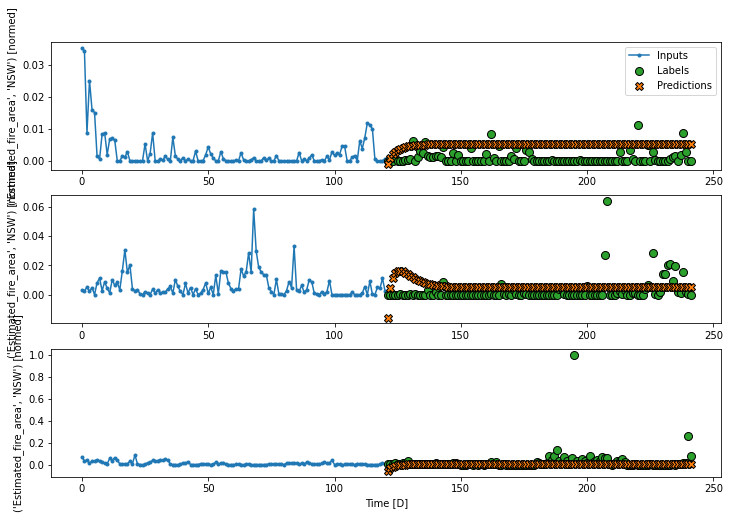

In [444]:
history = compile_and_fit(feedback_model, multi_window)

multi_val_performance['AR LSTM'] = feedback_model.evaluate(multi_window.val)
multi_performance['AR LSTM'] = feedback_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(feedback_model)




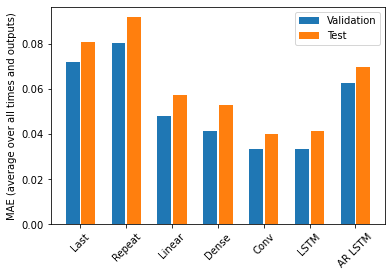

In [445]:
x = np.arange(len(multi_performance))
width = 0.3


metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in multi_val_performance.values()]
test_mae = [v[metric_index] for v in multi_performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=multi_performance.keys(),
           rotation=45)
plt.ylabel(f'MAE (average over all times and outputs)')
_ = plt.legend()

In [446]:
multi_conv_model

In [447]:
_albert = _queens_log['2019-07-03':'2019-10-31'].copy(deep=True)

In [448]:
_albert.shape

(121, 33)

In [449]:
_albert

Estimated_fire_area                                                \
Region                     NSW          NT         QL          SA         TA   
2019-07-03           12.744000  227.475426  49.729730    1.000000   1.000000   
2019-07-04           18.460000  258.850794  19.524286    2.415000   1.000000   
2019-07-05            4.612500  128.211864  48.639535    1.000000   1.000000   
2019-07-06            7.752000  246.980273  61.370000    1.000000   1.000000   
2019-07-07            3.000000   67.587895  57.675484    1.000000   1.000000   
...                        ...         ...        ...         ...        ...   
2019-10-27          175.634565   22.420000  50.888889   70.229744   1.000000   
2019-10-28          167.843429   18.578571  87.723636  143.403061   1.210000   
2019-10-29          123.313374   85.603235  11.215556   69.400278  20.520000   
2019-10-30           20.214211  131.171667   1.000000   66.883902   1.000000   
2019-10-31          111.773824   30.140000  25.846154   96.043200  25.066667   

                               Mean_estimated_fire_brightness              \
Region          VI          WA                            NSW          NT   
2019-07-03   1.000  104.644118                     313.075000  316.455319   
2019-07-04   7.920   43.500000                     303.950000  324.408995   
2019-07-05  20.955   51.570000                     317.275000  316.508475   
2019-07-06   1.000   38.138421                     307.450000  325.672951   
2019-07-07   1.000   31.269167                     310.483333  316.347368   
...            ...         ...                            ...         ...   
2019-10-27   1.000  551.823636                     326.622101  310.455556   
2019-10-28   1.000  453.910724                     316.330000  322.292857   
2019-10-29   1.000  245.176815                     319.664458  324.341177   
2019-10-30   1.000  543.328858                     308.136842  326.335417   
2019-10-31   1.000  606.238745                     313.617647  338.220455   

                        ...        month_3        month_4        month_5  \
Region              QL  ...                                                
2019-07-03  317.514865  ...   7.477697e-52   3.780278e-27   1.589391e-10   
2019-07-04  315.407143  ...   8.452903e-53   7.864686e-28   6.085665e-11   
2019-07-05  318.781395  ...   9.366083e-54   1.603811e-28   2.284018e-11   
2019-07-06  314.445833  ...   1.017242e-54   3.205819e-29   8.402431e-12   
2019-07-07  316.216129  ...   1.082941e-55   6.281148e-30   3.029874e-12   
...                ...  ...            ...            ...            ...   
2019-10-27  324.526389  ...  1.301653e-219  3.539393e-164  8.004116e-117   
2019-10-28  327.463636  ...  1.446006e-221  7.236412e-166  3.011809e-118   
2019-10-29  317.705556  ...  1.574560e-223  1.450213e-167  1.110851e-119   
2019-10-30  316.406624  ...  1.680592e-225  2.848751e-169  4.016040e-121   
2019-10-31  315.107692  ...  1.758245e-227  5.485185e-171  1.423162e-122   

                 month_6       month_7       month_8       month_9  \
Region                                                               
2019-07-03  5.557621e-02  1.616212e-01  2.511213e-09  3.723363e-25   
2019-07-04  3.916390e-02  2.096114e-01  6.054282e-09  1.652092e-24   
2019-07-05  2.705185e-02  2.664683e-01  1.430724e-08  7.185336e-24   
2019-07-06  1.831564e-02  3.320399e-01  3.314082e-08  3.063191e-23   
2019-07-07  1.215518e-02  4.055545e-01  7.524623e-08  1.280015e-22   
...                  ...           ...           ...           ...   
2019-10-27  1.505390e-77  2.354702e-46  6.277408e-23  5.006218e-08   
2019-10-28  1.042516e-78  3.001161e-47  1.487292e-23  2.182958e-08   
2019-10-29  7.076698e-80  3.749357e-48  3.454032e-24  9.330288e-09   
2019-10-30  4.708609e-81  4.591329e-49  7.862679e-25  3.908938e-09   
2019-10-31  3.070921e-82  5.511047e-50  1.754401e-25  1.605228e-09   

                month_10      month_11       month_12  
Region      

In [137]:
_scaled_alb = scaler.transform(_albert)
_albert = pd.DataFrame(data = _scaled_alb,
                      index = _albert.index,
                      columns = _albert.columns)
_albert

,NSW,NT,QL,SA,TA,VI,WA,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
Date,,,,,,,,,,,,,,,,,,,
2019-07-03,0.333606,0.588466,0.472475,0.000000,0.000000,0.000000,0.514325,4.955765e-124,1.230164e-84,7.496414e-52,3.780278e-27,1.593369e-10,5.557621e-02,1.620258e-01,2.517499e-09,3.723363e-25,4.602822e-49,4.708609e-81,4.026092e-121
2019-07-04,0.382177,0.602476,0.359400,0.118934,0.000000,0.270895,0.417245,1.687312e-125,7.555819e-86,8.474062e-53,7.864686e-28,6.100898e-11,3.916390e-02,2.101361e-01,6.069437e-09,1.652092e-24,3.758743e-48,7.076698e-80,1.113631e-119
2019-07-05,0.200391,0.526295,0.469794,0.000000,0.000000,0.398264,0.436066,5.631111e-127,4.548980e-87,9.389528e-54,1.603811e-28,2.289735e-11,2.705185e-02,2.671353e-01,1.434305e-08,7.185336e-24,3.008674e-47,1.042516e-78,3.019348e-118
2019-07-06,0.268445,0.597386,0.497911,0.000000,0.000000,0.000000,0.402698,1.842074e-128,2.684483e-88,1.019788e-54,3.205819e-29,8.423464e-12,1.831564e-02,3.328711e-01,3.322378e-08,3.063191e-23,2.360596e-46,1.505390e-77,8.024151e-117
2019-07-07,0.144006,0.456871,0.490402,0.000000,0.000000,0.000000,0.380735,5.906551e-130,1.552821e-89,1.085651e-55,6.281148e-30,3.037458e-12,1.215518e-02,4.065697e-01,7.543458e-08,1.280015e-22,1.815442e-45,2.130735e-76,2.090254e-115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-27,0.677473,0.337219,0.475261,0.573530,0.000000,0.000000,0.698206,0.000000e+00,3.981192e-283,1.304912e-219,3.539393e-164,8.024151e-117,1.505390e-77,2.360596e-46,6.293121e-23,5.006218e-08,3.328711e-01,1.831564e-02,8.423464e-12
2019-10-28,0.671526,0.316840,0.541120,0.669828,0.028371,0.000000,0.676604,0.000000e+00,2.403081e-285,1.449626e-221,7.236412e-166,3.019348e-118,1.042516e-78,3.008674e-47,1.491015e-23,2.182958e-08,2.671353e-01,2.705185e-02,2.289735e-11
2019-10-29,0.631113,0.482493,0.292355,0.571927,0.449696,0.000000,0.608486,0.000000e+00,1.421797e-287,1.578501e-223,1.450213e-167,1.113631e-119,7.076698e-80,3.758743e-48,3.462678e-24,9.330288e-09,2.101361e-01,3.916390e-02,6.100898e-11


In [450]:
yhat = multi_conv_model.predict(_albert.values.reshape(-1, 121, 33))

In [453]:
yhat_df = pd.DataFrame(data= yhat.reshape(121,33),
            columns = _albert.columns)

In [455]:
yhat_df.columns

MultiIndex([(                'Estimated_fire_area', 'NSW'),
            (                'Estimated_fire_area',  'NT'),
            (                'Estimated_fire_area',  'QL'),
            (                'Estimated_fire_area',  'SA'),
            (                'Estimated_fire_area',  'TA'),
            (                'Estimated_fire_area',  'VI'),
            (                'Estimated_fire_area',  'WA'),
            (     'Mean_estimated_fire_brightness', 'NSW'),
            (     'Mean_estimated_fire_brightness',  'NT'),
            (     'Mean_estimated_fire_brightness',  'QL'),
            (     'Mean_estimated_fire_brightness',  'SA'),
            (     'Mean_estimated_fire_brightness',  'TA'),
            (     'Mean_estimated_fire_brightness',  'VI'),
            (     'Mean_estimated_fire_brightness',  'WA'),
            ('Mean_estimated_fire_radiative_power', 'NSW'),
            ('Mean_estimated_fire_radiative_power',  'NT'),
            ('Mean_estimated_fire_radiat

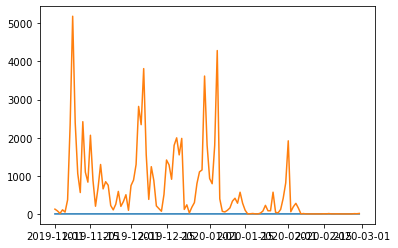

In [459]:
plt.plot(wildfires['2019-11-01':'2020-02-29'].index, np.exp(yhat_df[(                'Estimated_fire_area', 'NSW')]))
plt.plot(wildfires['2019-11-01':'2020-02-29'].index, wildfires['2019-11-01':'2020-02-29'][(                'Estimated_fire_area', 'NSW')])

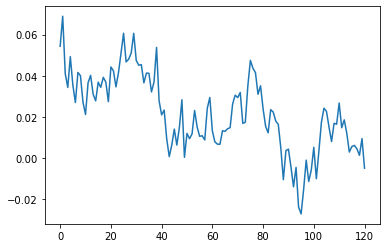

In [462]:
yhat_df[(                'Estimated_fire_area', 'NSW')].plot()

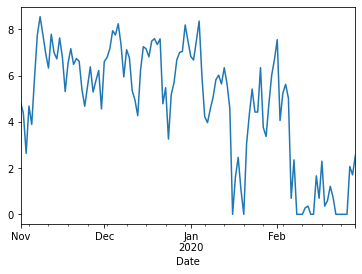

In [163]:
wildfires['2019-11-01':'2020-02-29']['NSW'].plot()

In [162]:
wildfires

,NSW,NT,QL,SA,TA,VI,WA
Date,,,,,,,
2005-01-01,0.000000,1.598377,3.659234,0.0,0.0,0.000000,3.594088
2005-01-02,0.000000,0.277632,4.166111,0.0,0.0,1.029619,4.997931
2005-01-03,0.000000,4.485711,3.858339,0.0,0.0,0.000000,4.104827
2005-01-04,2.161022,0.000000,3.404525,0.0,0.0,0.000000,4.458689
2005-01-05,2.810080,0.000000,1.386294,0.0,0.0,0.000000,3.446137
...,...,...,...,...,...,...,...
2020-10-27,0.190620,2.545531,4.365272,0.0,0.0,0.000000,3.495598
2020-10-28,1.098612,4.976669,4.784225,0.0,0.0,0.693147,3.036904
2020-10-29,0.000000,3.978977,5.517817,0.0,0.0,0.000000,4.913266


In [296]:
yhat.shape

(1, 121, 121)

In [289]:
_albert['QL'] = yhat.reshape(-1,)

ValueError: Length of values (14641) does not match length of index (121)

In [290]:
yhat.reshape(-1,1).T

array([[0.6391055 , 0.6496816 , 0.6399165 , ..., 0.24885584, 0.24024716,
        0.2499533 ]], dtype=float32)

In [199]:
_albert_rev = scaler.inverse_transform(_albert)
_albert = pd.DataFrame(data = _albert_rev,
                      index = _albert.index,
                      columns = _albert.columns)
_albert

,QL,min_Precipitation,min_RelativeHumidity,min_SoilWaterContent,min_SolarRadiation,min_Temperature,min_WindSpeed,max_Precipitation,max_RelativeHumidity,max_SoilWaterContent,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,3.292136,0.0,19.983921,0.000000e+00,7.230416,11.440632,1.022370,4.215558,82.940697,0.431191,...,7.477697e-52,3.780278e-27,1.589391e-10,5.557621e-02,1.616212e-01,2.511213e-09,3.723363e-25,4.591329e-49,4.708609e-81,4.016040e-121
1,3.257023,0.0,31.366232,2.444721e-07,3.063791,11.725621,1.484203,67.485741,92.183380,0.451811,...,8.452903e-53,7.864686e-28,6.085665e-11,3.916390e-02,2.096114e-01,6.054282e-09,1.652092e-24,3.749357e-48,7.076698e-80,1.110851e-119
2,3.287059,0.0,41.405987,0.000000e+00,1.907583,11.061883,1.292024,87.302437,98.953117,0.472589,...,9.366083e-54,1.603811e-28,2.284018e-11,2.705185e-02,2.664683e-01,1.430724e-08,7.185336e-24,3.001161e-47,1.042516e-78,3.011809e-118
3,3.275668,0.0,37.894844,0.000000e+00,1.767561,10.840035,1.364890,21.536255,95.611465,0.467914,...,1.017242e-54,3.205819e-29,8.402431e-12,1.831564e-02,3.320399e-01,3.314082e-08,3.063191e-23,2.354702e-46,1.505390e-77,8.004116e-117
4,3.288231,0.0,40.852909,7.137035e-07,2.024218,11.759003,1.442611,18.849819,94.745712,0.452713,...,1.082941e-55,6.281148e-30,3.029874e-12,1.215518e-02,4.055545e-01,7.524623e-08,1.280015e-22,1.810909e-45,2.130735e-76,2.085035e-115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,3.252088,0.0,9.651197,0.000000e+00,7.966677,18.945007,1.333130,5.296890,87.222832,0.369487,...,1.301653e-219,3.539393e-164,8.004116e-117,1.505390e-77,2.354702e-46,6.277408e-23,5.006218e-08,3.320399e-01,1.831564e-02,8.402431e-12
117,3.269769,0.0,12.238576,0.000000e+00,5.151309,17.442352,1.383587,7.661502,86.013046,0.356802,...,1.446006e-221,7.236412e-166,3.011809e-118,1.042516e-78,3.001161e-47,1.487292e-23,2.182958e-08,2.664683e-01,2.705185e-02,2.284018e-11
118,3.287658,0.0,26.689949,0.000000e+00,4.543444,17.328882,1.402968,52.385120,85.367989,0.369343,...,1.574560e-223,1.450213e-167,1.110851e-119,7.076698e-80,3.749357e-48,3.454032e-24,9.330288e-09,2.096114e-01,3.916390e-02,6.085665e-11
119,3.249960,0.0,20.757832,1.678786e-06,5.978366,17.417715,0.850873,31.894121,88.398758,0.470752,...,1.680592e-225,2.848751e-169,4.016040e-121,4.708609e-81,4.591329e-49,7.862679e-25,3.908938e-09,1.616212e-01,5.557621e-02,1.589391e-10


In [200]:
yhat_df = _albert.copy(deep=True)

In [201]:
yhat_df[:121]['QL']

0      3.292136
1      3.257023
2      3.287059
3      3.275668
4      3.288231
         ...   
116    3.252088
117    3.269769
118    3.287658
119    3.249960
120    3.287147
Name: QL, Length: 121, dtype: float64

In [202]:
np.where(yhat_df[:121]['QL'] <= 0, 0, yhat_df[:121]['QL'])

array([3.29213561, 3.25702338, 3.28705917, 3.27566829, 3.28823113,
       3.29160803, 3.28151601, 3.27150778, 3.29026136, 3.29233742,
       3.27268171, 3.2477714 , 3.28855837, 3.27188233, 3.26847759,
       3.27312329, 3.28191644, 3.25278352, 3.23396144, 3.28462259,
       3.28739577, 3.30775599, 3.2759083 , 3.2856679 , 3.28894204,
       3.28032187, 3.27619808, 3.24885982, 3.29252174, 3.24712505,
       3.25255904, 3.24900151, 3.28549639, 3.30539753, 3.28468666,
       3.28644657, 3.27451678, 3.29141829, 3.2917268 , 3.2625483 ,
       3.28617305, 3.29086705, 3.28688372, 3.27740479, 3.24675715,
       3.28349597, 3.27521685, 3.27275933, 3.28944744, 3.2802201 ,
       3.28745343, 3.26310471, 3.28759241, 3.27669954, 3.27671581,
       3.26852687, 3.3097978 , 3.26601859, 3.30831215, 3.29070368,
       3.28854531, 3.28684947, 3.27653765, 3.25079272, 3.28881242,
       3.29046268, 3.25366644, 3.3062356 , 3.28522237, 3.28610676,
       3.27508329, 3.28556612, 3.28550994, 3.2908944 , 3.27027

In [203]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(_queens_log['2019-11-01':'2020-02-29']['QL'].values,
                   np.where(yhat_df[:121]['QL'] <= 0, 0, yhat_df[:121]['QL']))

1.771370490467338

In [204]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(np.exp(_queens_log['2019-11-01':'2020-02-29']['QL'].values),
                   np.exp(np.where(yhat_df[:121]['QL'] <= 0, 0, yhat_df[:121]['QL'])))

183.88197364266742

In [205]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(np.exp(_queens_log['2019-11-01':'2020-02-29']['QL'].values),
                   np.exp(np.where(yhat_df[:121]['QL'] <= 0, 0, yhat_df[:121]['QL'])))

183.88197364266742

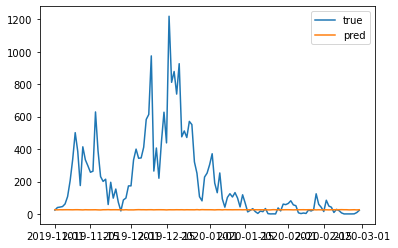

In [206]:
plt.plot(_queens_log['2019-11-01':'2020-02-29'].index, np.exp(_queens_log['2019-11-01':'2020-02-29']['QL']), label = 'true')
plt.plot(_queens_log['2019-11-01':'2020-02-29'].index, np.exp(yhat_df[:121]['QL']), label = 'pred')
plt.legend();

In [187]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(np.exp(_queens_log['2019-11-01':'2020-02-29']['QL'].values),
                   np.ones(121))

201.46880316663638